Load Packages

In [36]:
library(tsModel); library(splines); library(data.table); library(lmtest); library(mgcv); library(readxl); library(ggplot2); library(MuMIn); library(dplyr);

Load city's dataset and perform some preprocessing

In [37]:
# Load and inspect the dataset.
data <- read.csv("Zarqa.csv")
# convert data into Rdata table
data <- as.data.table(data)
data$date <- as.Date(data$Date)
data$trend <- as.numeric(data$date)
data$year <- year(data$date)
data$dow <- weekdays(data$date)
data$temp <- data$t2m
# Number of years
nyears=length(unique(data$year))

# Sort data by date
data <- data[order(data$date),]

names(data)
head(data)

[1] "Date"             "Total..30"        "Total_Male..30"   "Total_Female..30"
 [5] "X.65"             "X.65_Male"        "X.65_Female"      "Premature"       
 [9] "Premature_Male"   "Premature_Female" "YLL"              "YLL_Male"        
[13] "YLL_Female"       "Total"            "Total_Male"       "Total_Female"    
[17] "Holiday"          "PM10"             "NO2"              "SO2"             
[21] "t2m"              "sp"               "d2m"              "RH"              
[25] "Holiday.1"        "date"             "trend"            "year"            
[29] "dow"              "temp"

Date,Total..30,Total_Male..30,Total_Female..30,X.65,X.65_Male,X.65_Female,Premature,Premature_Male,Premature_Female,⋯,t2m,sp,d2m,RH,Holiday.1,date,trend,year,dow,temp
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<date>,<dbl>,<int>,<chr>,<dbl>
2015-01-01,7,5,2,4,3,1,4,2,2,⋯,11.80,94.5660,3.20,55.60,1,2015-01-01,16436,2015,Thursday,11.80
2015-01-02,10,7,3,5,3,2,8,7,1,⋯,9.29,94.8586,4.35,71.25,0,2015-01-02,16437,2015,Friday,9.29
2015-01-03,5,2,3,3,1,2,4,1,3,⋯,8.71,94.5982,3.88,71.69,1,2015-01-03,16438,2015,Saturday,8.71
2015-01-04,8,6,2,4,2,2,7,5,2,⋯,9.10,94.5249,4.48,72.83,0,2015-01-04,16439,2015,Sunday,9.10
2015-01-05,4,3,1,2,1,1,3,2,1,⋯,9.89,94.3057,1.50,55.93,0,2015-01-05,16440,2015,Monday,9.89
2015-01-06,11,6,5,9,6,3,6,2,4,⋯,8.93,93.9845,-1.11,49.39,0,2015-01-06,16441,2015,Tuesday,8.93


Specify the target variable (y)

In [38]:
data$y <- data$Total..30
data$y

[1]  7 10  5  8  4 11  1  4  7  8  6 14  6 13  8  9  5  8 10 13  7  5  6  7
  [25]  6  4  4  3  9  5  5  2  4  8  8  4  4  8  5  8  3  4  8  8  7  5  4  6
  [49]  6  8  4  7  6  4  3  5  6  5  7 10  7  3  5  8  3  3  7  4  4  6  7  4
  [73]  9  5  7  8  2  4  6 12  1  4  6  5  5  8  5  6  5  5  2  4  5  6  5  5
  [97]  6  4  7  8  4  7 10  4  4  3  6  4  7  2  4  3 10 11  3 10  6  5  3  4
 [121]  6  1  3  7  5  6  2  8  5  2  5  7  4  4  3  4  2  4  7  5  5  3  5  4
 [145]  7  5  8  5  4  2  6  6  3  5  2  2  7  5  1  3  6  3 12  3  5  5  4  5
 [169]  5 10  1  4  6  4  3  3  6  3  5  6 12  5  3  2  7  3  5  5  4  7  4  5
 [193]  6  3 12 10  5  2  8  5  4  6  8  3  5  3  1  5  3  7  5  4  3  8  7 11
 [217] 10  1  7  4  2  3  5  5  1  2  7  7  3  6  3  5  2  3  1  7  8  7  1  6
 [241]  6  2  2  4  0  3 10  4  3  4  4  6  6  8  5  8  5  7  1  5  6  3  6  4
 [265]  5  2  4  4  5  5  7  3  5  4  4  7  2  2  3  1  1  6  8  5  3  6  4  6
 [289]  5  6  4  4  5  8  6  5  3 10  4  4  3  6  4  7  1  4  4  3  4  2  8  9
 [313]  6  7  5  7  4  8  8  5  7  5  6  4  2  5  3  4  5  7  5  7  5  2  4  5
 [337]  5  1  7  5  5  6  3  6  4  5  8  4 12  3  6 11  7  4  9  9  5  9  8  9
 [361]  5  6  4  6  8  4  6  6  7  5  6  9 10 10  6  5  8  4  8  5  7  8  4  5
 [385] 10  7  3  5  9  3  5  5  7  5 10  3  9  4  7  7  6  6  7  6  4  7  5  4
 [409]  4  7  4  7  6  9  5  5  4 10  6  5  7  8  4  3  3  8 11  4  5  7  6  5
 [433]  6  6  7  5  9  5  4  6  4  3  6  6  7  3  4  8 10  6  7  8  3  5  5  6
 [457]  5  6  8 12  6  8  7  4  4  5  3  7  1  6  4  6  5  5  7  3  5  4  2  5
 [481]  7  8  6  3  4  1  9  4  3  6  7  9  5  4  3  8  7  4  7  0  5 12  3  3
 [505]  5  2  6  4  3  3  1  5  3  6  8  4  4  5  3  3  2  5  3  6  5  7  7  2
 [529]  3  3  4  7  3  5  7  5  4  3  7  3  6  5 10  6  6  7  7  7  1  2  3  5
 [553]  3  7  1  7  6 10  4  7  2  6  3  3  3  5  5  5  3  4  8  3  1  2  3  5
 [577]  6  3  3  6  6  4  2  5  6  3  2  4  2  7  6  5  6  7  7  5 11  2  4  4
 [601]  8  5  3  6  4  6  6  4  4  3  8  4  4  7  4  9  8  7  2  4  9  3  7  7
 [625]  3  6  6  9  1  3  6  4  3  3  6  4  2  1  4  5  6 10  7  9  6  4  5  5
 [649]  3  0  3  6  4  5  4  3  7  4  6  3  1  5  4  6  4  3  1  2  8  4  5  5
 [673]  6  4  5  3  5  6  4  4  5 12  4  7 10  6  6  6  2  3  4  5  7  4  5  4
 [697]  9  8  4  8  4  8  5  3  6  9  4  3  3  6  8  7  6  5  3  4  9  5  7  2
 [721]  6  3  8  5  8  6  8  7  9  3  7  3  9  5  9  7 NA  9 11  8  2  9  8  6
 [745]  7 11  8 10  6  8  8  9  7  8  5 11  9  8 10  8  4  6  8  6  6  9  5  5
 [769]  3  7  5  6  8  7  8  9  7  7 10  7  4  7  6  2  5  3  3  4  6 11  1  5
 [793]  4  7  4 10  3  4  8  4  7  1  4  7  8  0  5  6  8  4  7  4  6  5  2  9
 [817]  4  6  5  3  5  5 11  3  5  5  6  8  6  1  2  6  8  9  2  5  6  3  5  5
 [841]  5  1  5  6  3  6  5  5  4  7  5  5  8  4  1  4  5  2  6  4  4  6  6  6
 [865]  2  4  5  1  9  4  3  4  1  5  1  5  5  4  5  3  8  2  6  8  6  4  6  3
 [889]  4  5  9  4  3  1  4  4  2  4  4  9  2  2  3  3  7  5  5  6  5  3  9  6
 [913]  5  8  4 12  5  1  2  6  5  5  5  6  1  3  5  2  6  4  6  5  1  6  6  6
 [937]  8  2  3  7  3  1  3  1  3  2  2  2  4  7  2  4  4  4  4 12  8  3 10  7
 [961]  4  4  5  5  5  4  3  7  6  6  2  2  2  6  4  3  3  5  5  4  2  8  2  6
 [985]  5  6  4  4  5  3  3  6  4  4  3  8  8  4  5  2  2  6  3  5  4  7  1  7
[1009]  1  2  7  4 10  5  4  8  9  6  7  4  1  8  7  2  6  8 13  5  7  1  8  3
[1033]  8  8  3  9  4  2  6  7 10  8  9  4  2  4  8  5  7  4  4  4  5  5  2  8
[1057]  5  6  4  7  3  9  6  7  7  7  7  3  4  8  8  5 10  6  7  7 10  6  6  7
[1081] 11  8  7  6  6  5  9 10  5  7 14  4  4  6  5 12 11  8  9  7  6  7  7  5
[1105]  7  8  9 11  3  6  5  3 11 11  8  3  6  5  2  6  4 13  5  4  4  5  1  6
[1129]  2  1  6  6  3  1  3  7  8  9  1  5  5  4  1  5  7  5  7  3  5  4  2  4
[1153]  4  6  3  7  3 10  6  6  7  7  6  7  5  7  7  7  5  3  2  3  2  5  3  5
[1177]  4  2  6  5  7  5  8  3  6  9  2  4  7  6  3  7  5  7  5  4  4  3  6  9
[1201]  6  5  4  7  5  3  4  4  6  6  1  9  3  4  8  

Time series plotting

Visualize target variable overtime

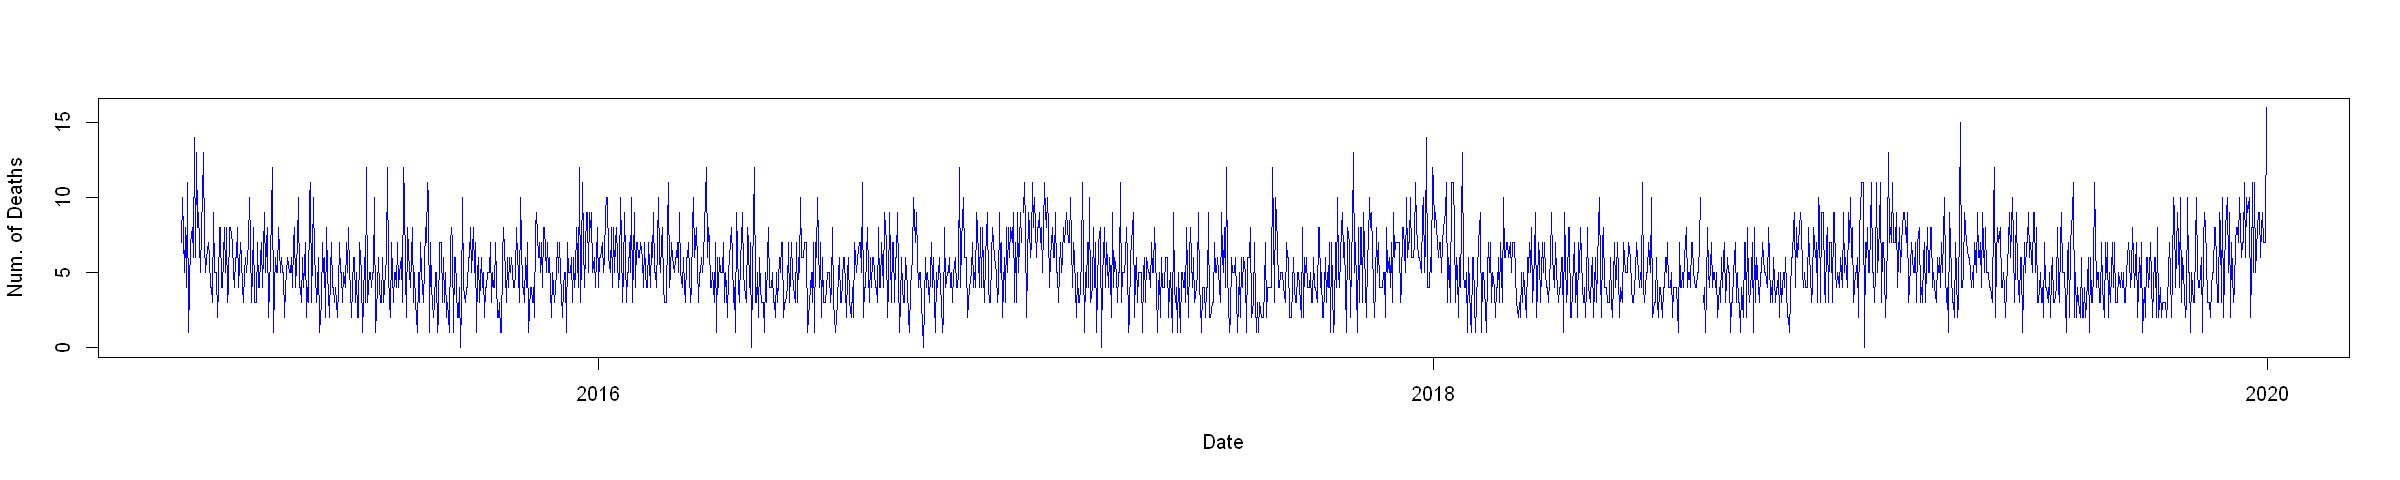

In [39]:
options(repr.plot.width=20, repr.plot.height=4)
plot(data$date, data$y, type="l", col= "blue", ylab="Num. of Deaths", xlab="Date")

Now we want to define the model as follows:
- Two spline terms for temperature, hot and cold
- Spline for trend to detrend the data and control for long-term trend and seasonality
- Day of week as a factor
- Holiday as a factor

define the required terms for temperature

In [40]:
data$l01temp 	<- (data$temp + lag(data$temp,1))/2
data$l16temp 	<- (lag(data$temp,1)+lag(data$temp,2)+lag(data$temp,3)+lag(data$temp,4)+lag(data$temp,5)+lag(data$temp,6))/6
data$l01temphot  <- ((data$l01temp - median(data$l01temp,na.rm=T))*(data$l01temp >= median(data$l01temp,na.rm=T)))+median(data$l01temp,na.rm=T)
data$l16tempcold <- ((data$l16temp - median(data$l16temp,na.rm=T))*(data$l16temp <= median(data$l16temp,na.rm=T)))+median(data$l16temp,na.rm=T)

perc.hot		    <- c(75/100, 90/100)
perc.cold		    <- c(25/100)
ktemphot.lag01	<- as.vector(quantile(data$l01temphot, perc.hot, na.rm=T))
ktempcold.lag16	<- as.vector(quantile(data$l16tempcold,perc.cold,na.rm=T))

Now perform sensitivity analysis to specify the optimal degrees of freedom per year for trend spline term

In [41]:
# Custom QAIC function for quasi-Poisson
QAIC <- function(model) {
  if (family(model)$family != "quasipoisson") {
    stop("Model must be quasi-Poisson")
  }
  
  # Overdispersion parameter (phi)
  phi <- summary(model)$dispersion
  
  # Refit as Poisson to get logLik
  mod_pois <- update(model, family = poisson)
  ll <- as.numeric(logLik(mod_pois))
  
  # Number of estimated parameters
  k <- length(coef(model))
  
  # QAIC formula
  qaic <- -2 * ll / phi + 2 * k
  return(qaic)
}

results <- data.frame(df_trend = integer(),
                      coef_PM = numeric(),
                      se_PM   = numeric(),
                      perc_increase = numeric(),
                      lowerCI = numeric(),
                      upperCI = numeric(),
                      qaic = numeric(),
                      lb_pvalue = numeric(),
                      Pr_val = numeric(),
                      stringsAsFactors = FALSE)

# Number of years in your dataset
nyears <- length(unique(format(data$date, "%Y")))

# Range of df multipliers you want to test for trend
df_range <- 4:8   # e.g. 4–10 per year, adjust as needed

results <- data.frame(df_time = integer(),
                      qaic = numeric(),
                      stringsAsFactors = FALSE)

for (df in df_range) {
  mod <- glm(y ~ PM10 + ns(l01temphot, k = ktemphot.lag01) +
                   ns(l16tempcold, k = ktempcold.lag16) +
                   ns(trend, df = df * nyears) +
                   as.factor(dow) +
                   as.factor(Holiday.1),
             data = data, family = quasipoisson)
  
  coef_PM <- coef(mod)["PM10"]
  se_PM   <- sqrt(vcov(mod)["PM10", "PM10"])
  
  # % change in mortality per unit increase (adjust as needed, e.g. per 10 units)
  perc_increase <- (exp(coef_PM * 10) - 1) * 100
  lowerCI <- (exp((coef_PM - 1.96*se_PM) * 10) - 1) * 100
  upperCI <- (exp((coef_PM + 1.96*se_PM) * 10) - 1) * 100

  qaic_val <- QAIC(mod)
  lb <- Box.test(residuals(mod, type="pearson"), lag = 20, type = "Ljung-Box")
  
  results <- rbind(results,
                   data.frame(df_trend = df,
                              coef_PM = coef_PM,
                              se_PM = se_PM,
                              perc_increase = perc_increase,
                              lowerCI = lowerCI,
                              upperCI = upperCI,
                              qaic = qaic_val,
                              lb_pvalue = lb$p.value,
                              Pr_val = summary(mod)$coefficients[2, "Pr(>|t|)"]))
}

print(results)



      df_trend      coef_PM        se_PM perc_increase    lowerCI   upperCI
PM10         4 0.0001768571 0.0003183066     0.1770136 -0.4460262 0.8039525
PM101        5 0.0002214482 0.0003224390     0.2216936 -0.4096907 0.8570807
PM102        6 0.0002580796 0.0003235433     0.2584129 -0.3753589 0.8962166
PM103        7 0.0002885836 0.0003249307     0.2890004 -0.3476747 0.9297432
PM104        8 0.0003378272 0.0003255173     0.3383985 -0.2997365 0.9806179
          qaic  lb_pvalue    Pr_val
PM10  7942.909 0.28929115 0.5785441
PM101 7953.293 0.20835650 0.4923077
PM102 7967.164 0.10988951 0.4251752
PM103 7963.527 0.07544618 0.3745917
PM104 7977.034 0.02049214 0.2995036


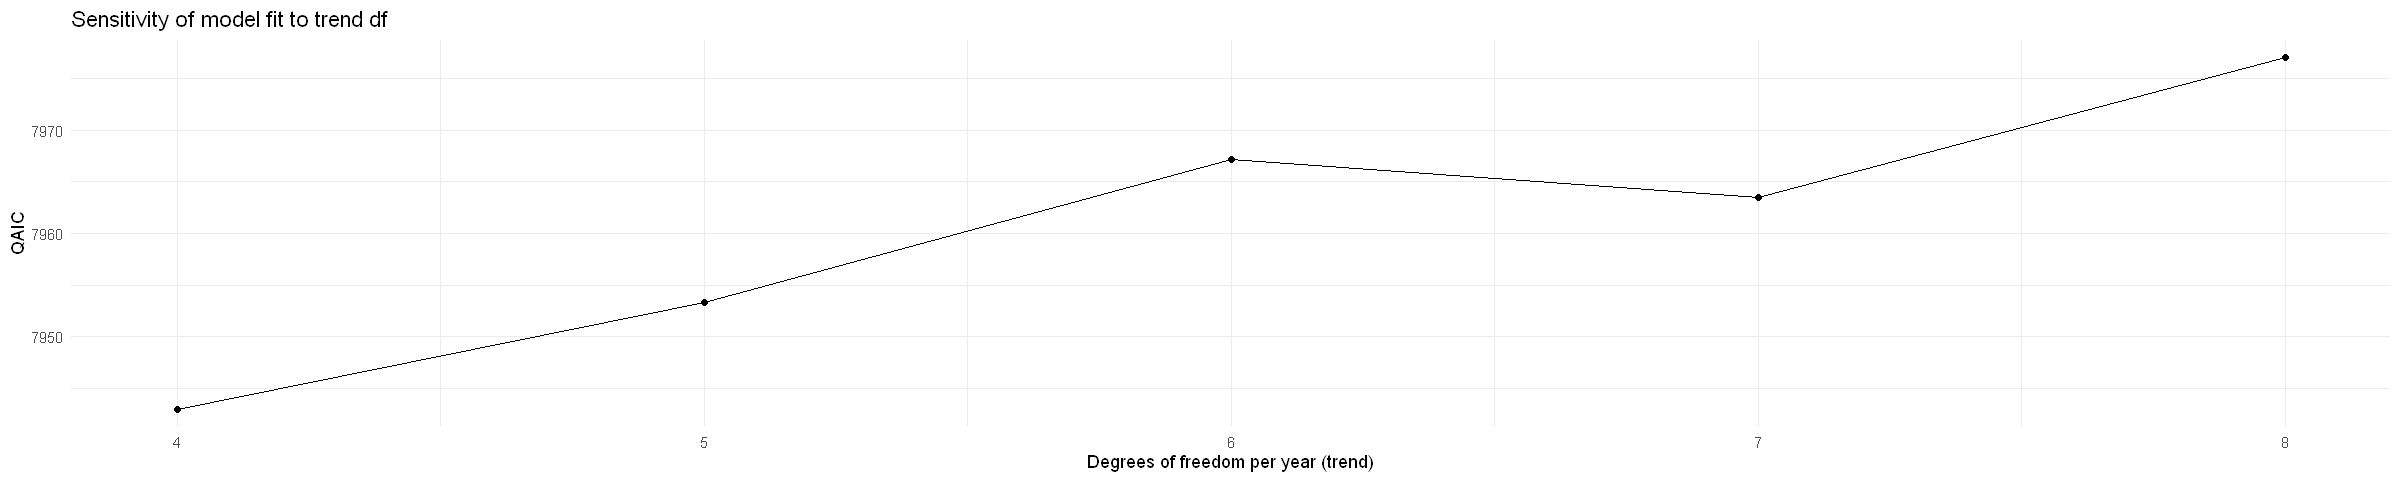

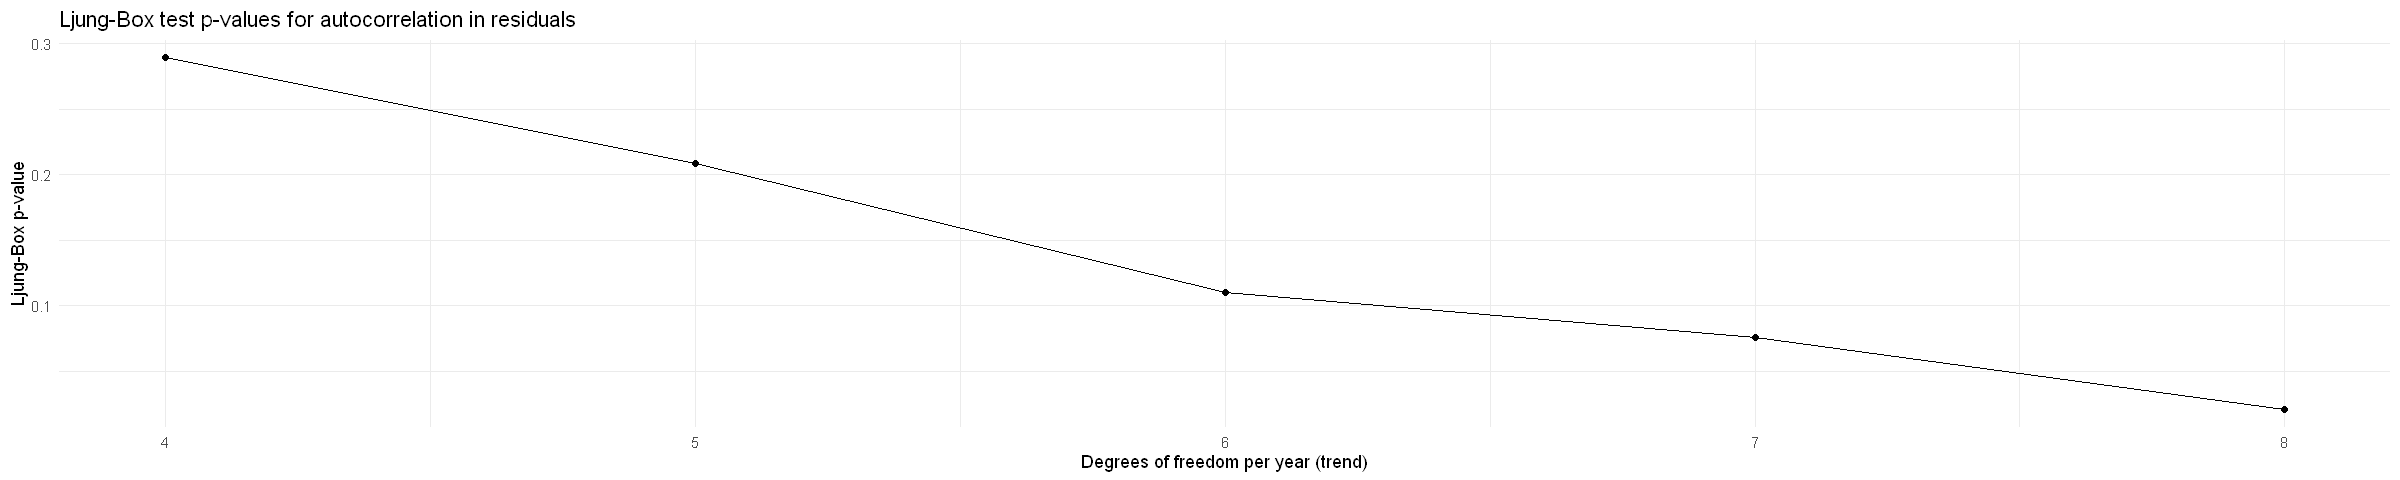

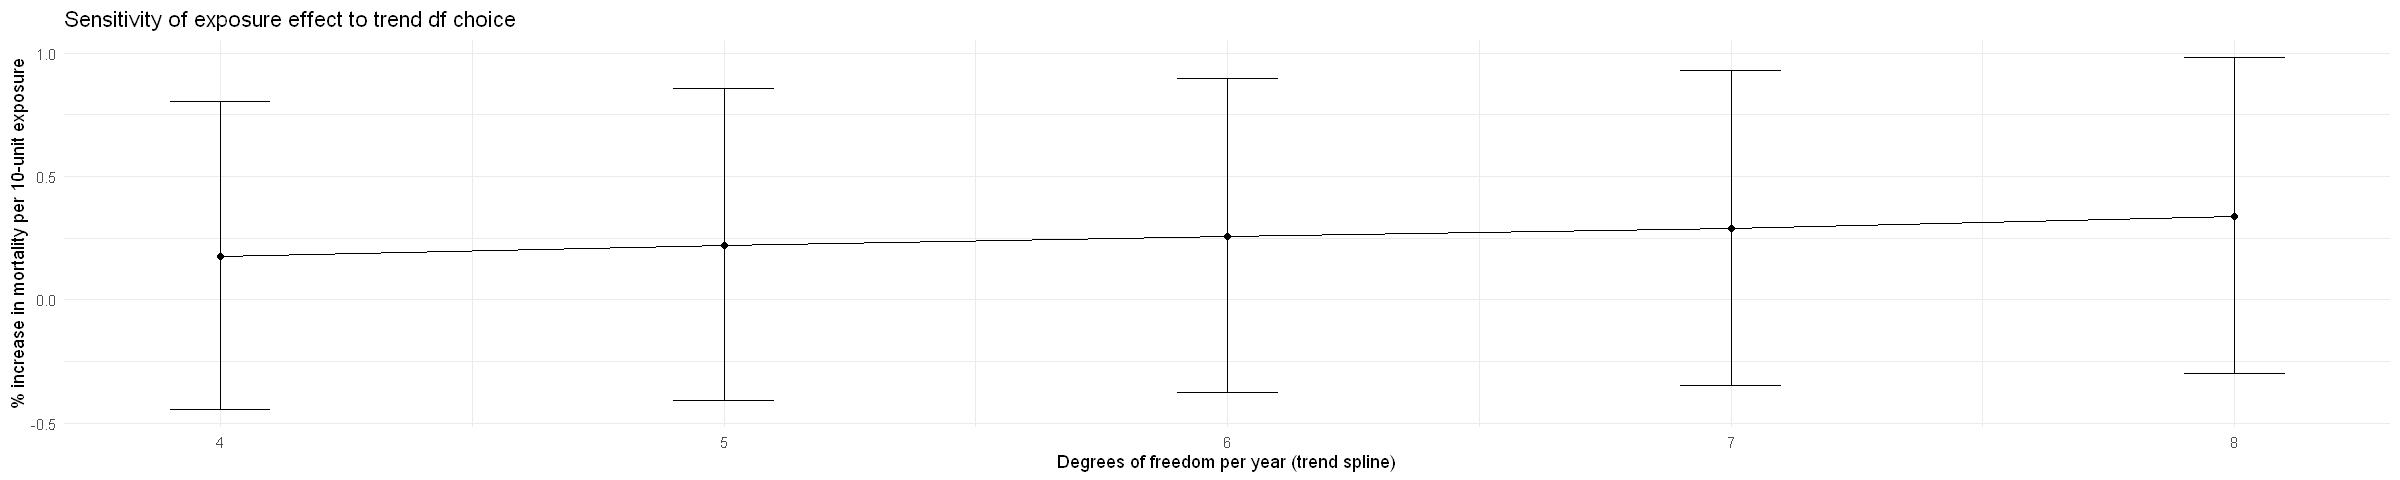

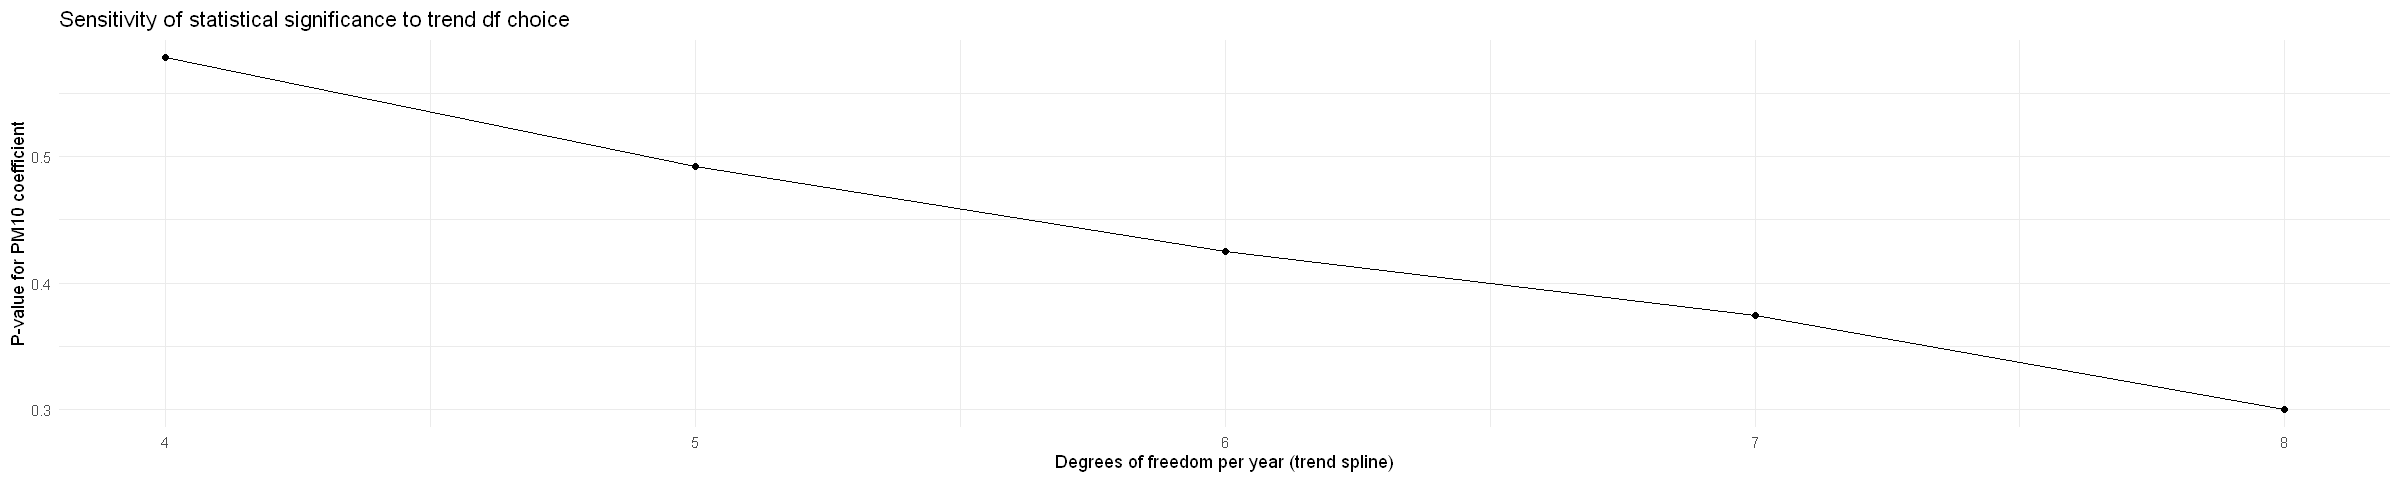

In [42]:
ggplot(results, aes(x = df_trend, y = qaic)) +
  geom_point() +
  geom_line() +
  labs(x = "Degrees of freedom per year (trend)",
       y = "QAIC",
       title = "Sensitivity of model fit to trend df") +
  theme_minimal()

ggplot(results, aes(x = df_trend, y = lb_pvalue)) +
  geom_point() +
  geom_line() +
  labs(x = "Degrees of freedom per year (trend)",
       y = "Ljung-Box p-value",
       title = "Ljung-Box test p-values for autocorrelation in residuals"
       ) +
  theme_minimal()

ggplot(results, aes(x = df_trend, y = perc_increase)) +
  geom_point() +
  geom_errorbar(aes(ymin = lowerCI, ymax = upperCI), width = 0.2) +
  geom_line() +
  labs(x = "Degrees of freedom per year (trend spline)",
       y = "% increase in mortality per 10-unit exposure",
       title = "Sensitivity of exposure effect to trend df choice") +
  theme_minimal()

ggplot(results, aes(x = df_trend, y = Pr_val)) +
  geom_point() +
  geom_line() +
  labs(x = "Degrees of freedom per year (trend spline)",
       y = "P-value for PM10 coefficient",
       title = "Sensitivity of statistical significance to trend df choice") +
  theme_minimal()

We pick 4 degrees of freedom for trend spline term

Define the model using the specified degrees of freedom

In [82]:
model5 <- glm(y ~ ns(l01temphot, k=ktemphot.lag01) + ns(l16tempcold, k=ktempcold.lag16) + ns(trend, df=4*nyears) + as.factor(dow) + as.factor(Holiday.1), data=data, family=quasipoisson)

In [83]:
summary(model5)


Call:
glm(formula = y ~ ns(l01temphot, k = ktemphot.lag01) + ns(l16tempcold, 
    k = ktempcold.lag16) + ns(trend, df = 4 * nyears) + as.factor(dow) + 
    as.factor(Holiday.1), family = quasipoisson, data = data)

Coefficients:
                                        Estimate Std. Error t value Pr(>|t|)
(Intercept)                            2.0030536  0.1046239  19.145  < 2e-16
ns(l01temphot, k = ktemphot.lag01)1    0.0386253  0.0793954   0.486 0.626678
ns(l01temphot, k = ktemphot.lag01)2    0.4391155  0.1397076   3.143 0.001699
ns(l01temphot, k = ktemphot.lag01)3    0.5082584  0.1442211   3.524 0.000436
ns(l16tempcold, k = ktempcold.lag16)1 -0.1293639  0.1770610  -0.731 0.465109
ns(l16tempcold, k = ktempcold.lag16)2  0.0007058  0.0840147   0.008 0.993298
ns(trend, df = 4 * nyears)1           -0.4717564  0.1716786  -2.748 0.006058
ns(trend, df = 4 * nyears)2           -0.7239176  0.2131760  -3.396 0.000699
ns(trend, df = 4 * nyears)3            0.0777675  0.1338370   0.581 0.561272


Now we analyze single lags

In [45]:
data <- arrange(data, date) %>% mutate( PM10_l1=lag(PM10,1), PM10_l2=lag(PM10,2), PM10_l3=lag(PM10,3),
                                        PM10_l4=lag(PM10,4), PM10_l5=lag(PM10,5), PM10_l6=lag(PM10,6), PM10_l7=lag(PM10,7))

In [46]:
mod5_0    <- update(model5, . ~ PM10 + .)
mod5_1    <- update(model5, . ~ PM10_l1 + .)
mod5_2    <- update(model5, . ~ PM10_l2 + .)
mod5_3    <- update(model5, . ~ PM10_l3 + .)
mod5_4    <- update(model5, . ~ PM10_l4 + .)
mod5_5    <- update(model5, . ~ PM10_l5 + .)
mod5_6    <- update(model5, . ~ PM10_l6 + .)

cp_mod5_0 <- data.table(Lag="0", beta=mod5_0$coefficients[2], se=sqrt(summary(mod5_0)$cov.scaled[2,2]), P_val = summary(mod5_0)$coefficients[2, "Pr(>|t|)"])
cp_mod5_1 <- data.table(Lag="1", beta=mod5_1$coefficients[2], se=sqrt(summary(mod5_1)$cov.scaled[2,2]), P_val = summary(mod5_1)$coefficients[2, "Pr(>|t|)"])
cp_mod5_2 <- data.table(Lag="2", beta=mod5_2$coefficients[2], se=sqrt(summary(mod5_2)$cov.scaled[2,2]), P_val = summary(mod5_2)$coefficients[2, "Pr(>|t|)"])
cp_mod5_3 <- data.table(Lag="3", beta=mod5_3$coefficients[2], se=sqrt(summary(mod5_3)$cov.scaled[2,2]), P_val = summary(mod5_3)$coefficients[2, "Pr(>|t|)"])
cp_mod5_4 <- data.table(Lag="4", beta=mod5_4$coefficients[2], se=sqrt(summary(mod5_4)$cov.scaled[2,2]), P_val = summary(mod5_4)$coefficients[2, "Pr(>|t|)"])
cp_mod5_5 <- data.table(Lag="5", beta=mod5_5$coefficients[2], se=sqrt(summary(mod5_5)$cov.scaled[2,2]), P_val = summary(mod5_5)$coefficients[2, "Pr(>|t|)"])
cp_mod5_6 <- data.table(Lag="6", beta=mod5_6$coefficients[2], se=sqrt(summary(mod5_6)$cov.scaled[2,2]), P_val = summary(mod5_6)$coefficients[2, "Pr(>|t|)"])

res1       <- rbind(cp_mod5_0, cp_mod5_1, cp_mod5_2, cp_mod5_3, cp_mod5_4, cp_mod5_5, cp_mod5_6)   
res1[, RR    := exp(beta*10)]
res1[, inf   := exp((beta-1.96*se)*10)]
res1[, sup   := exp((beta+1.96*se)*10)]
res1[, IR10  := (RR-1)*100]
res1[, inf10 := (inf-1)*100]
res1[, sup10 := (sup-1)*100]
res1[, significance := ifelse(P_val < 0.001, "***", 
                      ifelse(P_val < 0.01, "**", 
                      ifelse(P_val < 0.05, "*", "")))]
res1

Lag,beta,se,P_val,RR,inf,sup,IR10,inf10,sup10,significance
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0,1.768571e-04,0.0003183066,0.57854412,1.0017701,0.9955397,1.008040,0.17701357,-0.4460262,0.80395250,
1,-2.206188e-04,0.0003259838,0.49863793,0.9977962,0.9914414,1.004192,-0.22037561,-0.8558635,0.41918556,
2,-8.646280e-05,0.0003234110,0.78923459,0.9991357,0.9928224,1.005489,-0.08642543,-0.7177601,0.54892393,
3,2.247431e-04,0.0003224616,0.48592190,1.0022500,0.9959355,1.008604,0.22499581,-0.4064533,0.86044853,
4,-2.277934e-05,0.0003255960,0.94423208,0.9997722,0.9934123,1.006173,-0.02277675,-0.6587681,0.61728629,
5,-1.289218e-04,0.0003249138,0.69157334,0.9987116,0.9923717,1.005092,-0.12883878,-0.7628284,0.50920118,
6,-5.802882e-04,0.0003264013,0.07560825,0.9942139,0.9878738,1.000595,-0.57860776,-1.2126225,0.05947603,


Average Lags

In [47]:
# Build the average lags
data <- arrange(data, date) %>% mutate( PM10_l01=(PM10    + PM10_l1)/2,
                                        PM10_l25=(PM10_l2 + PM10_l3 + PM10_l4 + PM10_l5)/4,
                                        PM10_l05=(PM10    + PM10_l1 + PM10_l2 + PM10_l3 + PM10_l4 + PM10_l5)/6)

In [48]:
mod5_01    <- update(model5, . ~ PM10_l01 + .)
mod5_25    <- update(model5, . ~ PM10_l25 + .)
mod5_05    <- update(model5, . ~ PM10_l05 + .)

cp_mod5_01 <- data.table(Lag="01", beta=mod5_01$coefficients[2], se=sqrt(summary(mod5_01)$cov.scaled[2,2]), P_val = summary(mod5_01)$coefficients[2, "Pr(>|t|)"])
cp_mod5_25 <- data.table(Lag="25", beta=mod5_25$coefficients[2], se=sqrt(summary(mod5_25)$cov.scaled[2,2]), P_val = summary(mod5_25)$coefficients[2, "Pr(>|t|)"])
cp_mod5_05 <- data.table(Lag="05", beta=mod5_05$coefficients[2], se=sqrt(summary(mod5_05)$cov.scaled[2,2]), P_val = summary(mod5_05)$coefficients[2, "Pr(>|t|)"])

res       <- rbind(cp_mod5_01, cp_mod5_25, cp_mod5_05)   
res[, RR    := exp(beta*10)]
res[, inf   := exp((beta-1.96*se)*10)]
res[, sup   := exp((beta+1.96*se)*10)]
res[, IR10  := (RR-1)*100]
res[, inf10 := (inf-1)*100]
res[, sup10 := (sup-1)*100]
res[, significance := ifelse(P_val < 0.001, "***", 
                      ifelse(P_val < 0.01, "**", 
                      ifelse(P_val < 0.05, "*", "")))]
res

Lag,beta,se,P_val,RR,inf,sup,IR10,inf10,sup10,significance
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
01,-0.0001249986,0.0003952955,0.7518781,0.9987508,0.9910426,1.006519,-0.1249205,-0.895742,0.6518963,
25,-0.0002126382,0.0005351276,0.6911546,0.9978759,0.9874644,1.008397,-0.2124123,-1.253565,0.8397179,
05,-0.0004354947,0.0006501205,0.5030413,0.9956545,0.9830480,1.008423,-0.4345478,-1.695198,0.8422688,


Now check for NO2

In [49]:
data <- arrange(data, date) %>% mutate( NO2_l1=lag(NO2,1), NO2_l2=lag(NO2,2), NO2_l3=lag(NO2,3),
                                        NO2_l4=lag(NO2,4), NO2_l5=lag(NO2,5), NO2_l6=lag(NO2,6), NO2_l7=lag(NO2,7))

data <- arrange(data, date) %>% mutate( NO2_l01=(NO2    + NO2_l1)/2,
                                        NO2_l25=(NO2_l2 + NO2_l3 + NO2_l4 + NO2_l5)/4,
                                        NO2_l05=(NO2    + NO2_l1 + NO2_l2 + NO2_l3 + NO2_l4 + NO2_l5)/6)

In [50]:
mod5_0    <- update(model5, . ~ NO2 + .)
mod5_1    <- update(model5, . ~ NO2_l1 + .)
mod5_2    <- update(model5, . ~ NO2_l2 + .)
mod5_3    <- update(model5, . ~ NO2_l3 + .)
mod5_4    <- update(model5, . ~ NO2_l4 + .)
mod5_5    <- update(model5, . ~ NO2_l5 + .)
mod5_6    <- update(model5, . ~ NO2_l6 + .)

mod5_01    <- update(model5, . ~ NO2_l01 + .)
mod5_25    <- update(model5, . ~ NO2_l25 + .)
mod5_05    <- update(model5, . ~ NO2_l05 + .)

cp_mod5_0 <- data.table(Lag="0", beta=mod5_0$coefficients[2], se=sqrt(summary(mod5_0)$cov.scaled[2,2]), P_val = summary(mod5_0)$coefficients[2, "Pr(>|t|)"])
cp_mod5_1 <- data.table(Lag="1", beta=mod5_1$coefficients[2], se=sqrt(summary(mod5_1)$cov.scaled[2,2]), P_val = summary(mod5_1)$coefficients[2, "Pr(>|t|)"])
cp_mod5_2 <- data.table(Lag="2", beta=mod5_2$coefficients[2], se=sqrt(summary(mod5_2)$cov.scaled[2,2]), P_val = summary(mod5_2)$coefficients[2, "Pr(>|t|)"])
cp_mod5_3 <- data.table(Lag="3", beta=mod5_3$coefficients[2], se=sqrt(summary(mod5_3)$cov.scaled[2,2]), P_val = summary(mod5_3)$coefficients[2, "Pr(>|t|)"])
cp_mod5_4 <- data.table(Lag="4", beta=mod5_4$coefficients[2], se=sqrt(summary(mod5_4)$cov.scaled[2,2]), P_val = summary(mod5_4)$coefficients[2, "Pr(>|t|)"])
cp_mod5_5 <- data.table(Lag="5", beta=mod5_5$coefficients[2], se=sqrt(summary(mod5_5)$cov.scaled[2,2]), P_val = summary(mod5_5)$coefficients[2, "Pr(>|t|)"])
cp_mod5_6 <- data.table(Lag="6", beta=mod5_6$coefficients[2], se=sqrt(summary(mod5_6)$cov.scaled[2,2]), P_val = summary(mod5_6)$coefficients[2, "Pr(>|t|)"])
cp_mod5_01 <- data.table(Lag="01", beta=mod5_01$coefficients[2], se=sqrt(summary(mod5_01)$cov.scaled[2,2]), P_val = summary(mod5_01)$coefficients[2, "Pr(>|t|)"])
cp_mod5_25 <- data.table(Lag="25", beta=mod5_25$coefficients[2], se=sqrt(summary(mod5_25)$cov.scaled[2,2]), P_val = summary(mod5_25)$coefficients[2, "Pr(>|t|)"])
cp_mod5_05 <- data.table(Lag="05", beta=mod5_05$coefficients[2], se=sqrt(summary(mod5_05)$cov.scaled[2,2]), P_val = summary(mod5_05)$coefficients[2, "Pr(>|t|)"])

res2       <- rbind(cp_mod5_0, cp_mod5_1, cp_mod5_2, cp_mod5_3, cp_mod5_4, cp_mod5_5, cp_mod5_6, cp_mod5_01, cp_mod5_25, cp_mod5_05) 
res2[, RR    := exp(beta*10)]
res2[, inf   := exp((beta-1.96*se)*10)]
res2[, sup   := exp((beta+1.96*se)*10)]
res2[, IR10  := (RR-1)*100]
res2[, inf10 := (inf-1)*100]
res2[, sup10 := (sup-1)*100]
res2[, significance := ifelse(P_val < 0.001, "***", 
                      ifelse(P_val < 0.01, "**", 
                      ifelse(P_val < 0.05, "*", "")))]
res2

Lag,beta,se,P_val,RR,inf,sup,IR10,inf10,sup10,significance
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0,0.0027920309,0.002231808,0.2110951,1.0283137,0.9843014,1.074294,2.8313734,-1.569861,7.4294058,
1,0.0013010880,0.002289816,0.5699677,1.0130959,0.9686330,1.059600,1.3095889,-3.136704,5.9599786,
2,-0.0036743409,0.002267281,0.1052848,0.9639234,0.9220258,1.007725,-3.6076563,-7.797425,0.7724992,
3,-0.0006138971,0.002231156,0.7832353,0.9938798,0.9513535,1.038307,-0.6120166,-4.864655,3.8307185,
4,-0.0022909956,0.002239504,0.3064527,0.9773505,0.9353783,1.021206,-2.2649515,-6.462171,2.1206048,
5,-0.0012183407,0.002254184,0.5889350,0.9878905,0.9451937,1.032516,-1.2109490,-5.480632,3.2516065,
6,0.0003165898,0.002265758,0.8888910,1.0031709,0.9595960,1.048725,0.3170914,-4.040404,4.8724594,
01,0.0029572938,0.002613986,0.2580698,1.0300146,0.9785717,1.084162,3.0014560,-2.142827,8.4161705,
25,-0.0042730324,0.003195728,0.1813638,0.9581698,0.8999945,1.020105,-4.1830249,-10.000547,2.0105386,


Now SO2

In [51]:
data <- arrange(data, date) %>% mutate( SO2_l1=lag(SO2,1), SO2_l2=lag(SO2,2), SO2_l3=lag(SO2,3),
                                        SO2_l4=lag(SO2,4), SO2_l5=lag(SO2,5), SO2_l6=lag(SO2,6), SO2_l7=lag(SO2,7))

data <- arrange(data, date) %>% mutate( SO2_l01=(SO2    + SO2_l1)/2,
                                        SO2_l25=(SO2_l2 + SO2_l3 + SO2_l4 + SO2_l5)/4,
                                        SO2_l05=(SO2    + SO2_l1 + SO2_l2 + SO2_l3 + SO2_l4 + SO2_l5)/6)

In [52]:
mod5_0    <- update(model5, . ~ SO2 + .)
mod5_1    <- update(model5, . ~ SO2_l1 + .)
mod5_2    <- update(model5, . ~ SO2_l2 + .)
mod5_3    <- update(model5, . ~ SO2_l3 + .)
mod5_4    <- update(model5, . ~ SO2_l4 + .)
mod5_5    <- update(model5, . ~ SO2_l5 + .)
mod5_6    <- update(model5, . ~ SO2_l6 + .)

mod5_01    <- update(model5, . ~ SO2_l01 + .)
mod5_25    <- update(model5, . ~ SO2_l25 + .)
mod5_05    <- update(model5, . ~ SO2_l05 + .)

cp_mod5_0 <- data.table(Lag="0", beta=mod5_0$coefficients[2], se=sqrt(summary(mod5_0)$cov.scaled[2,2]), P_val = summary(mod5_0)$coefficients[2, "Pr(>|t|)"])
cp_mod5_1 <- data.table(Lag="1", beta=mod5_1$coefficients[2], se=sqrt(summary(mod5_1)$cov.scaled[2,2]), P_val = summary(mod5_1)$coefficients[2, "Pr(>|t|)"])
cp_mod5_2 <- data.table(Lag="2", beta=mod5_2$coefficients[2], se=sqrt(summary(mod5_2)$cov.scaled[2,2]), P_val = summary(mod5_2)$coefficients[2, "Pr(>|t|)"])
cp_mod5_3 <- data.table(Lag="3", beta=mod5_3$coefficients[2], se=sqrt(summary(mod5_3)$cov.scaled[2,2]), P_val = summary(mod5_3)$coefficients[2, "Pr(>|t|)"])
cp_mod5_4 <- data.table(Lag="4", beta=mod5_4$coefficients[2], se=sqrt(summary(mod5_4)$cov.scaled[2,2]), P_val = summary(mod5_4)$coefficients[2, "Pr(>|t|)"])
cp_mod5_5 <- data.table(Lag="5", beta=mod5_5$coefficients[2], se=sqrt(summary(mod5_5)$cov.scaled[2,2]), P_val = summary(mod5_5)$coefficients[2, "Pr(>|t|)"])
cp_mod5_6 <- data.table(Lag="6", beta=mod5_6$coefficients[2], se=sqrt(summary(mod5_6)$cov.scaled[2,2]), P_val = summary(mod5_6)$coefficients[2, "Pr(>|t|)"])
cp_mod5_01 <- data.table(Lag="01", beta=mod5_01$coefficients[2], se=sqrt(summary(mod5_01)$cov.scaled[2,2]), P_val = summary(mod5_01)$coefficients[2, "Pr(>|t|)"])
cp_mod5_25 <- data.table(Lag="25", beta=mod5_25$coefficients[2], se=sqrt(summary(mod5_25)$cov.scaled[2,2]), P_val = summary(mod5_25)$coefficients[2, "Pr(>|t|)"])
cp_mod5_05 <- data.table(Lag="05", beta=mod5_05$coefficients[2], se=sqrt(summary(mod5_05)$cov.scaled[2,2]), P_val = summary(mod5_05)$coefficients[2, "Pr(>|t|)"])

res3       <- rbind(cp_mod5_0, cp_mod5_1, cp_mod5_2, cp_mod5_3, cp_mod5_4, cp_mod5_5, cp_mod5_6, cp_mod5_01, cp_mod5_25, cp_mod5_05) 
res3[, RR    := exp(beta*10)]
res3[, inf   := exp((beta-1.96*se)*10)]
res3[, sup   := exp((beta+1.96*se)*10)]
res3[, IR10  := (RR-1)*100]
res3[, inf10 := (inf-1)*100]
res3[, sup10 := (sup-1)*100]
res3[, significance := ifelse(P_val < 0.001, "***", 
                      ifelse(P_val < 0.01, "**", 
                      ifelse(P_val < 0.05, "*", "")))]
res3

Lag,beta,se,P_val,RR,inf,sup,IR10,inf10,sup10,significance
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0,2.541721e-03,0.003000717,0.3970895,1.0257430,0.9671547,1.087880,2.57429857,-3.284531,8.788045,
1,-5.397466e-04,0.003035874,0.8589088,0.9946171,0.9371606,1.055596,-0.53829255,-6.283939,5.559614,
2,-3.318231e-03,0.003089498,0.2829544,0.9673622,0.9105227,1.027750,-3.26378202,-8.947732,2.774989,
3,9.852441e-05,0.003120271,0.9748141,1.0009857,0.9416025,1.064114,0.09857296,-5.839750,6.411403,
4,-2.586922e-04,0.003155383,0.9346685,0.9974164,0.9375995,1.061050,-0.25835785,-6.240053,6.104957,
5,-7.038570e-04,0.003178148,0.8247541,0.9929861,0.9330185,1.056808,-0.70138569,-6.698153,5.680810,
6,-2.914920e-03,0.003190935,0.3611052,0.9712715,0.9123866,1.033957,-2.87284569,-8.761345,3.395695,
01,1.252641e-03,0.003260462,0.7008835,1.0126052,0.9499189,1.079428,1.26051959,-5.008108,7.942822,
25,-1.186714e-03,0.003774559,0.7532567,0.9882030,0.9177333,1.064084,-1.17970036,-8.226673,6.408386,


### Now gender based analysis

#### PM10

Male

In [53]:
data$y <- data$Total_Male..30

In [54]:
mod5_0    <- update(model5, . ~ PM10 + .)
mod5_1    <- update(model5, . ~ PM10_l1 + .)
mod5_2    <- update(model5, . ~ PM10_l2 + .)
mod5_3    <- update(model5, . ~ PM10_l3 + .)
mod5_4    <- update(model5, . ~ PM10_l4 + .)
mod5_5    <- update(model5, . ~ PM10_l5 + .)
mod5_6    <- update(model5, . ~ PM10_l6 + .)
mod5_01    <- update(model5, . ~ PM10_l01 + .)
mod5_25    <- update(model5, . ~ PM10_l25 + .)
mod5_05    <- update(model5, . ~ PM10_l05 + .)

cp_mod5_0 <- data.table(Lag="0", beta=mod5_0$coefficients[2], se=sqrt(summary(mod5_0)$cov.scaled[2,2]), P_val = summary(mod5_0)$coefficients[2, "Pr(>|t|)"])
cp_mod5_1 <- data.table(Lag="1", beta=mod5_1$coefficients[2], se=sqrt(summary(mod5_1)$cov.scaled[2,2]), P_val = summary(mod5_1)$coefficients[2, "Pr(>|t|)"])
cp_mod5_2 <- data.table(Lag="2", beta=mod5_2$coefficients[2], se=sqrt(summary(mod5_2)$cov.scaled[2,2]), P_val = summary(mod5_2)$coefficients[2, "Pr(>|t|)"])
cp_mod5_3 <- data.table(Lag="3", beta=mod5_3$coefficients[2], se=sqrt(summary(mod5_3)$cov.scaled[2,2]), P_val = summary(mod5_3)$coefficients[2, "Pr(>|t|)"])
cp_mod5_4 <- data.table(Lag="4", beta=mod5_4$coefficients[2], se=sqrt(summary(mod5_4)$cov.scaled[2,2]), P_val = summary(mod5_4)$coefficients[2, "Pr(>|t|)"])
cp_mod5_5 <- data.table(Lag="5", beta=mod5_5$coefficients[2], se=sqrt(summary(mod5_5)$cov.scaled[2,2]), P_val = summary(mod5_5)$coefficients[2, "Pr(>|t|)"])
cp_mod5_6 <- data.table(Lag="6", beta=mod5_6$coefficients[2], se=sqrt(summary(mod5_6)$cov.scaled[2,2]), P_val = summary(mod5_6)$coefficients[2, "Pr(>|t|)"])
cp_mod5_01 <- data.table(Lag="01", beta=mod5_01$coefficients[2], se=sqrt(summary(mod5_01)$cov.scaled[2,2]), P_val = summary(mod5_01)$coefficients[2, "Pr(>|t|)"])
cp_mod5_25 <- data.table(Lag="25", beta=mod5_25$coefficients[2], se=sqrt(summary(mod5_25)$cov.scaled[2,2]), P_val = summary(mod5_25)$coefficients[2, "Pr(>|t|)"])
cp_mod5_05 <- data.table(Lag="05", beta=mod5_05$coefficients[2], se=sqrt(summary(mod5_05)$cov.scaled[2,2]), P_val = summary(mod5_05)$coefficients[2, "Pr(>|t|)"])

res4       <- rbind(cp_mod5_0, cp_mod5_1, cp_mod5_2, cp_mod5_3, cp_mod5_4, cp_mod5_5, cp_mod5_6, cp_mod5_01, cp_mod5_25, cp_mod5_05) 
res4[, RR    := exp(beta*10)]
res4[, inf   := exp((beta-1.96*se)*10)]
res4[, sup   := exp((beta+1.96*se)*10)]
res4[, IR10  := (RR-1)*100]
res4[, inf10 := (inf-1)*100]
res4[, sup10 := (sup-1)*100]
res4[, significance := ifelse(P_val < 0.001, "***", 
                      ifelse(P_val < 0.01, "**", 
                      ifelse(P_val < 0.05, "*", "")))]
res4

Lag,beta,se,P_val,RR,inf,sup,IR10,inf10,sup10,significance
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0,0.0001567487,0.0004295185,0.715200865,1.0015687,0.9931723,1.0100361,0.1568716,-0.682766,1.0036075,
1,-0.0007104113,0.0004417243,0.107960624,0.9929211,0.9843617,1.0015549,-0.7078939,-1.563834,0.1554890,
2,-0.0006864806,0.0004391829,0.118217128,0.9931587,0.9846463,1.0017447,-0.6841297,-1.535370,0.1744700,
3,-0.0006477920,0.0004430239,0.143868328,0.9935430,0.9849532,1.0022078,-0.6456983,-1.504684,0.2207782,
4,-0.0009966588,0.0004483193,0.026339083,0.9900829,0.9814211,0.9988212,-0.9917086,-1.857889,-0.1178835,*
5,-0.0006870867,0.0004393814,0.118058974,0.9931527,0.9846365,1.0017425,-0.6847317,-1.536350,0.1742526,
6,-0.0011272404,0.0004456016,0.011504982,0.9887909,0.9801926,0.9974646,-1.1209109,-1.980740,-0.2535392,*
01,-0.0005591171,0.0005330150,0.294342549,0.9944244,0.9840897,1.0048677,-0.5575570,-1.591034,0.4867732,
25,-0.0019891070,0.0007265822,0.006256391,0.9803055,0.9664438,0.9943659,-1.9694548,-3.355615,-0.5634126,**


Female

In [55]:
data$y <- data$Total_Female..30

In [56]:
mod5_0    <- update(model5, . ~ PM10 + .)
mod5_1    <- update(model5, . ~ PM10_l1 + .)
mod5_2    <- update(model5, . ~ PM10_l2 + .)
mod5_3    <- update(model5, . ~ PM10_l3 + .)
mod5_4    <- update(model5, . ~ PM10_l4 + .)
mod5_5    <- update(model5, . ~ PM10_l5 + .)
mod5_6    <- update(model5, . ~ PM10_l6 + .)
mod5_01    <- update(model5, . ~ PM10_l01 + .)
mod5_25    <- update(model5, . ~ PM10_l25 + .)
mod5_05    <- update(model5, . ~ PM10_l05 + .)

cp_mod5_0 <- data.table(Lag="0", beta=mod5_0$coefficients[2], se=sqrt(summary(mod5_0)$cov.scaled[2,2]), P_val = summary(mod5_0)$coefficients[2, "Pr(>|t|)"])
cp_mod5_1 <- data.table(Lag="1", beta=mod5_1$coefficients[2], se=sqrt(summary(mod5_1)$cov.scaled[2,2]), P_val = summary(mod5_1)$coefficients[2, "Pr(>|t|)"])
cp_mod5_2 <- data.table(Lag="2", beta=mod5_2$coefficients[2], se=sqrt(summary(mod5_2)$cov.scaled[2,2]), P_val = summary(mod5_2)$coefficients[2, "Pr(>|t|)"])
cp_mod5_3 <- data.table(Lag="3", beta=mod5_3$coefficients[2], se=sqrt(summary(mod5_3)$cov.scaled[2,2]), P_val = summary(mod5_3)$coefficients[2, "Pr(>|t|)"])
cp_mod5_4 <- data.table(Lag="4", beta=mod5_4$coefficients[2], se=sqrt(summary(mod5_4)$cov.scaled[2,2]), P_val = summary(mod5_4)$coefficients[2, "Pr(>|t|)"])
cp_mod5_5 <- data.table(Lag="5", beta=mod5_5$coefficients[2], se=sqrt(summary(mod5_5)$cov.scaled[2,2]), P_val = summary(mod5_5)$coefficients[2, "Pr(>|t|)"])
cp_mod5_6 <- data.table(Lag="6", beta=mod5_6$coefficients[2], se=sqrt(summary(mod5_6)$cov.scaled[2,2]), P_val = summary(mod5_6)$coefficients[2, "Pr(>|t|)"])
cp_mod5_01 <- data.table(Lag="01", beta=mod5_01$coefficients[2], se=sqrt(summary(mod5_01)$cov.scaled[2,2]), P_val = summary(mod5_01)$coefficients[2, "Pr(>|t|)"])
cp_mod5_25 <- data.table(Lag="25", beta=mod5_25$coefficients[2], se=sqrt(summary(mod5_25)$cov.scaled[2,2]), P_val = summary(mod5_25)$coefficients[2, "Pr(>|t|)"])
cp_mod5_05 <- data.table(Lag="05", beta=mod5_05$coefficients[2], se=sqrt(summary(mod5_05)$cov.scaled[2,2]), P_val = summary(mod5_05)$coefficients[2, "Pr(>|t|)"])

res4       <- rbind(cp_mod5_0, cp_mod5_1, cp_mod5_2, cp_mod5_3, cp_mod5_4, cp_mod5_5, cp_mod5_6, cp_mod5_01, cp_mod5_25, cp_mod5_05) 
res4[, RR    := exp(beta*10)]
res4[, inf   := exp((beta-1.96*se)*10)]
res4[, sup   := exp((beta+1.96*se)*10)]
res4[, IR10  := (RR-1)*100]
res4[, inf10 := (inf-1)*100]
res4[, sup10 := (sup-1)*100]
res4[, significance := ifelse(P_val < 0.001, "***", 
                      ifelse(P_val < 0.01, "**", 
                      ifelse(P_val < 0.05, "*", "")))]
res4

Lag,beta,se,P_val,RR,inf,sup,IR10,inf10,sup10,significance
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0,0.0002025917,0.0004857211,0.676661361,1.002028,0.9925338,1.011613,0.2027971,-0.7466204,1.161296,
1,0.0004242807,0.0004902760,0.386945023,1.004252,0.9946478,1.013949,0.4251821,-0.5352227,1.394860,
2,0.0006966730,0.0004838042,0.150053111,1.006991,0.9974873,1.016585,0.6991054,-0.2512671,1.658533,
3,0.0013317308,0.0004743064,0.005045535,1.013406,1.0040290,1.022871,1.3406378,0.4028997,2.287134,**
4,0.0012024678,0.0004778439,0.011945261,1.012097,1.0026625,1.021621,1.2097265,0.2662477,2.162083,*
5,0.0006046706,0.0004879555,0.215444295,1.006065,0.9964890,1.015733,0.6065024,-0.3511045,1.573312,
6,0.0001245875,0.0004876989,0.798398620,1.001247,0.9917214,1.010863,0.1246652,-0.8278566,1.086336,
01,0.0004494251,0.0005995133,0.453570602,1.004504,0.9927701,1.016377,0.4504365,-0.7229947,1.637737,
25,0.0020964120,0.0008008111,0.008930921,1.021185,1.0052821,1.037340,2.1185411,0.5282123,3.734028,**


#### NO2

Male

In [57]:
data$y <- data$Total_Male..30

In [58]:
mod5_0    <- update(model5, . ~ NO2 + .)
mod5_1    <- update(model5, . ~ NO2_l1 + .)
mod5_2    <- update(model5, . ~ NO2_l2 + .)
mod5_3    <- update(model5, . ~ NO2_l3 + .)
mod5_4    <- update(model5, . ~ NO2_l4 + .)
mod5_5    <- update(model5, . ~ NO2_l5 + .)
mod5_6    <- update(model5, . ~ NO2_l6 + .)

mod5_01    <- update(model5, . ~ NO2_l01 + .)
mod5_25    <- update(model5, . ~ NO2_l25 + .)
mod5_05    <- update(model5, . ~ NO2_l05 + .)

cp_mod5_0 <- data.table(Lag="0", beta=mod5_0$coefficients[2], se=sqrt(summary(mod5_0)$cov.scaled[2,2]), P_val = summary(mod5_0)$coefficients[2, "Pr(>|t|)"])
cp_mod5_1 <- data.table(Lag="1", beta=mod5_1$coefficients[2], se=sqrt(summary(mod5_1)$cov.scaled[2,2]), P_val = summary(mod5_1)$coefficients[2, "Pr(>|t|)"])
cp_mod5_2 <- data.table(Lag="2", beta=mod5_2$coefficients[2], se=sqrt(summary(mod5_2)$cov.scaled[2,2]), P_val = summary(mod5_2)$coefficients[2, "Pr(>|t|)"])
cp_mod5_3 <- data.table(Lag="3", beta=mod5_3$coefficients[2], se=sqrt(summary(mod5_3)$cov.scaled[2,2]), P_val = summary(mod5_3)$coefficients[2, "Pr(>|t|)"])
cp_mod5_4 <- data.table(Lag="4", beta=mod5_4$coefficients[2], se=sqrt(summary(mod5_4)$cov.scaled[2,2]), P_val = summary(mod5_4)$coefficients[2, "Pr(>|t|)"])
cp_mod5_5 <- data.table(Lag="5", beta=mod5_5$coefficients[2], se=sqrt(summary(mod5_5)$cov.scaled[2,2]), P_val = summary(mod5_5)$coefficients[2, "Pr(>|t|)"])
cp_mod5_6 <- data.table(Lag="6", beta=mod5_6$coefficients[2], se=sqrt(summary(mod5_6)$cov.scaled[2,2]), P_val = summary(mod5_6)$coefficients[2, "Pr(>|t|)"])
cp_mod5_01 <- data.table(Lag="01", beta=mod5_01$coefficients[2], se=sqrt(summary(mod5_01)$cov.scaled[2,2]), P_val = summary(mod5_01)$coefficients[2, "Pr(>|t|)"])
cp_mod5_25 <- data.table(Lag="25", beta=mod5_25$coefficients[2], se=sqrt(summary(mod5_25)$cov.scaled[2,2]), P_val = summary(mod5_25)$coefficients[2, "Pr(>|t|)"])
cp_mod5_05 <- data.table(Lag="05", beta=mod5_05$coefficients[2], se=sqrt(summary(mod5_05)$cov.scaled[2,2]), P_val = summary(mod5_05)$coefficients[2, "Pr(>|t|)"])

res2       <- rbind(cp_mod5_0, cp_mod5_1, cp_mod5_2, cp_mod5_3, cp_mod5_4, cp_mod5_5, cp_mod5_6, cp_mod5_01, cp_mod5_25, cp_mod5_05) 
res2[, RR    := exp(beta*10)]
res2[, inf   := exp((beta-1.96*se)*10)]
res2[, sup   := exp((beta+1.96*se)*10)]
res2[, IR10  := (RR-1)*100]
res2[, inf10 := (inf-1)*100]
res2[, sup10 := (sup-1)*100]
res2[, significance := ifelse(P_val < 0.001, "***", 
                      ifelse(P_val < 0.01, "**", 
                      ifelse(P_val < 0.05, "*", "")))]
res2

Lag,beta,se,P_val,RR,inf,sup,IR10,inf10,sup10,significance
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0,0.0034281048,0.003017263,0.2560434,1.0348754,0.9754491,1.097922,3.4875416,-2.455092,9.792212,
1,0.0035051795,0.003078697,0.2550561,1.0356733,0.9750265,1.100092,3.5673350,-2.497353,10.009249,
2,-0.0038394671,0.003059278,0.2096373,0.9623331,0.9063257,1.021801,-3.7666939,-9.367428,2.180143,
3,-0.0011159106,0.003016931,0.7115146,0.9889029,0.9321226,1.049142,-1.1097074,-6.787743,4.914207,
4,-0.0016297710,0.003027782,0.5904574,0.9838344,0.9271479,1.043987,-1.6165621,-7.285215,4.398677,
5,-0.0001178111,0.003030951,0.9689990,0.9988226,0.9412140,1.059957,-0.1177417,-5.878600,5.995720,
6,0.0003788020,0.003067398,0.9017309,1.0037952,0.9452243,1.065995,0.3795204,-5.477566,6.599541,
01,0.0049164957,0.003523964,0.1631451,1.0503936,0.9802921,1.125508,5.0393606,-1.970794,12.550818,
25,-0.0033593068,0.004318287,0.4367194,0.9669649,0.8884904,1.052371,-3.3035086,-11.150965,5.237062,


Female

In [59]:
data$y <- data$Total_Female..30

In [60]:
mod5_0    <- update(model5, . ~ NO2 + .)
mod5_1    <- update(model5, . ~ NO2_l1 + .)
mod5_2    <- update(model5, . ~ NO2_l2 + .)
mod5_3    <- update(model5, . ~ NO2_l3 + .)
mod5_4    <- update(model5, . ~ NO2_l4 + .)
mod5_5    <- update(model5, . ~ NO2_l5 + .)
mod5_6    <- update(model5, . ~ NO2_l6 + .)

mod5_01    <- update(model5, . ~ NO2_l01 + .)
mod5_25    <- update(model5, . ~ NO2_l25 + .)
mod5_05    <- update(model5, . ~ NO2_l05 + .)

cp_mod5_0 <- data.table(Lag="0", beta=mod5_0$coefficients[2], se=sqrt(summary(mod5_0)$cov.scaled[2,2]), P_val = summary(mod5_0)$coefficients[2, "Pr(>|t|)"])
cp_mod5_1 <- data.table(Lag="1", beta=mod5_1$coefficients[2], se=sqrt(summary(mod5_1)$cov.scaled[2,2]), P_val = summary(mod5_1)$coefficients[2, "Pr(>|t|)"])
cp_mod5_2 <- data.table(Lag="2", beta=mod5_2$coefficients[2], se=sqrt(summary(mod5_2)$cov.scaled[2,2]), P_val = summary(mod5_2)$coefficients[2, "Pr(>|t|)"])
cp_mod5_3 <- data.table(Lag="3", beta=mod5_3$coefficients[2], se=sqrt(summary(mod5_3)$cov.scaled[2,2]), P_val = summary(mod5_3)$coefficients[2, "Pr(>|t|)"])
cp_mod5_4 <- data.table(Lag="4", beta=mod5_4$coefficients[2], se=sqrt(summary(mod5_4)$cov.scaled[2,2]), P_val = summary(mod5_4)$coefficients[2, "Pr(>|t|)"])
cp_mod5_5 <- data.table(Lag="5", beta=mod5_5$coefficients[2], se=sqrt(summary(mod5_5)$cov.scaled[2,2]), P_val = summary(mod5_5)$coefficients[2, "Pr(>|t|)"])
cp_mod5_6 <- data.table(Lag="6", beta=mod5_6$coefficients[2], se=sqrt(summary(mod5_6)$cov.scaled[2,2]), P_val = summary(mod5_6)$coefficients[2, "Pr(>|t|)"])
cp_mod5_01 <- data.table(Lag="01", beta=mod5_01$coefficients[2], se=sqrt(summary(mod5_01)$cov.scaled[2,2]), P_val = summary(mod5_01)$coefficients[2, "Pr(>|t|)"])
cp_mod5_25 <- data.table(Lag="25", beta=mod5_25$coefficients[2], se=sqrt(summary(mod5_25)$cov.scaled[2,2]), P_val = summary(mod5_25)$coefficients[2, "Pr(>|t|)"])
cp_mod5_05 <- data.table(Lag="05", beta=mod5_05$coefficients[2], se=sqrt(summary(mod5_05)$cov.scaled[2,2]), P_val = summary(mod5_05)$coefficients[2, "Pr(>|t|)"])

res2       <- rbind(cp_mod5_0, cp_mod5_1, cp_mod5_2, cp_mod5_3, cp_mod5_4, cp_mod5_5, cp_mod5_6, cp_mod5_01, cp_mod5_25, cp_mod5_05) 
res2[, RR    := exp(beta*10)]
res2[, inf   := exp((beta-1.96*se)*10)]
res2[, sup   := exp((beta+1.96*se)*10)]
res2[, IR10  := (RR-1)*100]
res2[, inf10 := (inf-1)*100]
res2[, sup10 := (sup-1)*100]
res2[, significance := ifelse(P_val < 0.001, "***", 
                      ifelse(P_val < 0.01, "**", 
                      ifelse(P_val < 0.05, "*", "")))]
res2

Lag,beta,se,P_val,RR,inf,sup,IR10,inf10,sup10,significance
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0,1.939283e-03,0.003402711,0.5688030,1.0195821,0.9538009,1.089900,1.95820901,-4.619908,8.990001,
1,-1.657923e-03,0.003502677,0.6360365,0.9835574,0.9182995,1.053453,-1.64425527,-8.170051,5.345289,
2,-3.434983e-03,0.003453011,0.3199810,0.9662334,0.9030035,1.033891,-3.37665716,-9.699649,3.389082,
3,8.632216e-05,0.003373379,0.9795879,1.0008636,0.9368285,1.069276,0.08635942,-6.317146,6.927563,
4,-3.129430e-03,0.003388119,0.3557967,0.9691903,0.9069196,1.035737,-3.08096970,-9.308035,3.573657,
5,-2.661148e-03,0.003428347,0.4377245,0.9737395,0.9104584,1.041419,-2.62605115,-8.954161,4.141891,
6,2.556328e-04,0.003432536,0.9406422,1.0025596,0.9373286,1.072330,0.25595985,-6.267142,7.233020,
01,3.344007e-04,0.003992593,0.9332606,1.0033496,0.9278262,1.085020,0.33496048,-7.217376,8.502043,
25,-5.436074e-03,0.004855441,0.2630470,0.9470904,0.8611149,1.041650,-5.29096091,-13.888515,4.164991,


#### SO2

Male

In [61]:
data$y <- data$Total_Male..30

In [62]:
mod5_0    <- update(model5, . ~ SO2 + .)
mod5_1    <- update(model5, . ~ SO2_l1 + .)
mod5_2    <- update(model5, . ~ SO2_l2 + .)
mod5_3    <- update(model5, . ~ SO2_l3 + .)
mod5_4    <- update(model5, . ~ SO2_l4 + .)
mod5_5    <- update(model5, . ~ SO2_l5 + .)
mod5_6    <- update(model5, . ~ SO2_l6 + .)

mod5_01    <- update(model5, . ~ SO2_l01 + .)
mod5_25    <- update(model5, . ~ SO2_l25 + .)
mod5_05    <- update(model5, . ~ SO2_l05 + .)

cp_mod5_0 <- data.table(Lag="0", beta=mod5_0$coefficients[2], se=sqrt(summary(mod5_0)$cov.scaled[2,2]), P_val = summary(mod5_0)$coefficients[2, "Pr(>|t|)"])
cp_mod5_1 <- data.table(Lag="1", beta=mod5_1$coefficients[2], se=sqrt(summary(mod5_1)$cov.scaled[2,2]), P_val = summary(mod5_1)$coefficients[2, "Pr(>|t|)"])
cp_mod5_2 <- data.table(Lag="2", beta=mod5_2$coefficients[2], se=sqrt(summary(mod5_2)$cov.scaled[2,2]), P_val = summary(mod5_2)$coefficients[2, "Pr(>|t|)"])
cp_mod5_3 <- data.table(Lag="3", beta=mod5_3$coefficients[2], se=sqrt(summary(mod5_3)$cov.scaled[2,2]), P_val = summary(mod5_3)$coefficients[2, "Pr(>|t|)"])
cp_mod5_4 <- data.table(Lag="4", beta=mod5_4$coefficients[2], se=sqrt(summary(mod5_4)$cov.scaled[2,2]), P_val = summary(mod5_4)$coefficients[2, "Pr(>|t|)"])
cp_mod5_5 <- data.table(Lag="5", beta=mod5_5$coefficients[2], se=sqrt(summary(mod5_5)$cov.scaled[2,2]), P_val = summary(mod5_5)$coefficients[2, "Pr(>|t|)"])
cp_mod5_6 <- data.table(Lag="6", beta=mod5_6$coefficients[2], se=sqrt(summary(mod5_6)$cov.scaled[2,2]), P_val = summary(mod5_6)$coefficients[2, "Pr(>|t|)"])
cp_mod5_01 <- data.table(Lag="01", beta=mod5_01$coefficients[2], se=sqrt(summary(mod5_01)$cov.scaled[2,2]), P_val = summary(mod5_01)$coefficients[2, "Pr(>|t|)"])
cp_mod5_25 <- data.table(Lag="25", beta=mod5_25$coefficients[2], se=sqrt(summary(mod5_25)$cov.scaled[2,2]), P_val = summary(mod5_25)$coefficients[2, "Pr(>|t|)"])
cp_mod5_05 <- data.table(Lag="05", beta=mod5_05$coefficients[2], se=sqrt(summary(mod5_05)$cov.scaled[2,2]), P_val = summary(mod5_05)$coefficients[2, "Pr(>|t|)"])

res3       <- rbind(cp_mod5_0, cp_mod5_1, cp_mod5_2, cp_mod5_3, cp_mod5_4, cp_mod5_5, cp_mod5_6, cp_mod5_01, cp_mod5_25, cp_mod5_05) 
res3[, RR    := exp(beta*10)]
res3[, inf   := exp((beta-1.96*se)*10)]
res3[, sup   := exp((beta+1.96*se)*10)]
res3[, IR10  := (RR-1)*100]
res3[, inf10 := (inf-1)*100]
res3[, sup10 := (sup-1)*100]
res3[, significance := ifelse(P_val < 0.001, "***", 
                      ifelse(P_val < 0.01, "**", 
                      ifelse(P_val < 0.05, "*", "")))]
res3

Lag,beta,se,P_val,RR,inf,sup,IR10,inf10,sup10,significance
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0,0.0020280774,0.004092119,0.62023481,1.0204878,0.9418354,1.1057085,2.0487826,-5.816461,10.5708511,
1,-0.0015895399,0.004118659,0.69959072,0.9842303,0.9078999,1.0669780,-1.5769734,-9.210008,6.6977968,
2,-0.0089020373,0.004206752,0.03447430,0.9148269,0.8424233,0.9934535,-8.5173065,-15.757674,-0.6546518,*
3,-0.0057985889,0.004261441,0.17378000,0.9436633,0.8680464,1.0258673,-5.6336737,-13.195362,2.5867252,
4,-0.0033472738,0.004292414,0.43560712,0.9670813,0.8890480,1.0519637,-3.2918725,-11.095200,5.1963669,
5,-0.0044574689,0.004303898,0.30049348,0.9564042,0.8790345,1.0405836,-4.3595835,-12.096547,4.0583608,
6,-0.0079943991,0.004353130,0.06645718,0.9231681,0.8476688,1.0053918,-7.6831950,-15.233124,0.5391835,
01,0.0002226345,0.004428997,0.95991500,1.0022288,0.9188963,1.0931186,0.2228825,-8.110370,9.3118581,
25,-0.0073900024,0.005107961,0.14814533,0.9287645,0.8402834,1.0265627,-7.1235457,-15.971659,2.6562667,


Female

In [63]:
data$y <- data$Total_Female..30

In [64]:
mod5_0    <- update(model5, . ~ SO2 + .)
mod5_1    <- update(model5, . ~ SO2_l1 + .)
mod5_2    <- update(model5, . ~ SO2_l2 + .)
mod5_3    <- update(model5, . ~ SO2_l3 + .)
mod5_4    <- update(model5, . ~ SO2_l4 + .)
mod5_5    <- update(model5, . ~ SO2_l5 + .)
mod5_6    <- update(model5, . ~ SO2_l6 + .)

mod5_01    <- update(model5, . ~ SO2_l01 + .)
mod5_25    <- update(model5, . ~ SO2_l25 + .)
mod5_05    <- update(model5, . ~ SO2_l05 + .)

cp_mod5_0 <- data.table(Lag="0", beta=mod5_0$coefficients[2], se=sqrt(summary(mod5_0)$cov.scaled[2,2]), P_val = summary(mod5_0)$coefficients[2, "Pr(>|t|)"])
cp_mod5_1 <- data.table(Lag="1", beta=mod5_1$coefficients[2], se=sqrt(summary(mod5_1)$cov.scaled[2,2]), P_val = summary(mod5_1)$coefficients[2, "Pr(>|t|)"])
cp_mod5_2 <- data.table(Lag="2", beta=mod5_2$coefficients[2], se=sqrt(summary(mod5_2)$cov.scaled[2,2]), P_val = summary(mod5_2)$coefficients[2, "Pr(>|t|)"])
cp_mod5_3 <- data.table(Lag="3", beta=mod5_3$coefficients[2], se=sqrt(summary(mod5_3)$cov.scaled[2,2]), P_val = summary(mod5_3)$coefficients[2, "Pr(>|t|)"])
cp_mod5_4 <- data.table(Lag="4", beta=mod5_4$coefficients[2], se=sqrt(summary(mod5_4)$cov.scaled[2,2]), P_val = summary(mod5_4)$coefficients[2, "Pr(>|t|)"])
cp_mod5_5 <- data.table(Lag="5", beta=mod5_5$coefficients[2], se=sqrt(summary(mod5_5)$cov.scaled[2,2]), P_val = summary(mod5_5)$coefficients[2, "Pr(>|t|)"])
cp_mod5_6 <- data.table(Lag="6", beta=mod5_6$coefficients[2], se=sqrt(summary(mod5_6)$cov.scaled[2,2]), P_val = summary(mod5_6)$coefficients[2, "Pr(>|t|)"])
cp_mod5_01 <- data.table(Lag="01", beta=mod5_01$coefficients[2], se=sqrt(summary(mod5_01)$cov.scaled[2,2]), P_val = summary(mod5_01)$coefficients[2, "Pr(>|t|)"])
cp_mod5_25 <- data.table(Lag="25", beta=mod5_25$coefficients[2], se=sqrt(summary(mod5_25)$cov.scaled[2,2]), P_val = summary(mod5_25)$coefficients[2, "Pr(>|t|)"])
cp_mod5_05 <- data.table(Lag="05", beta=mod5_05$coefficients[2], se=sqrt(summary(mod5_05)$cov.scaled[2,2]), P_val = summary(mod5_05)$coefficients[2, "Pr(>|t|)"])

res3       <- rbind(cp_mod5_0, cp_mod5_1, cp_mod5_2, cp_mod5_3, cp_mod5_4, cp_mod5_5, cp_mod5_6, cp_mod5_01, cp_mod5_25, cp_mod5_05) 
res3[, RR    := exp(beta*10)]
res3[, inf   := exp((beta-1.96*se)*10)]
res3[, sup   := exp((beta+1.96*se)*10)]
res3[, IR10  := (RR-1)*100]
res3[, inf10 := (inf-1)*100]
res3[, sup10 := (sup-1)*100]
res3[, significance := ifelse(P_val < 0.001, "***", 
                      ifelse(P_val < 0.01, "**", 
                      ifelse(P_val < 0.05, "*", "")))]
res3

Lag,beta,se,P_val,RR,inf,sup,IR10,inf10,sup10,significance
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0,0.0032273026,0.004524475,0.47575578,1.032799,0.9451547,1.128572,3.279945,-5.484531,12.85716,
1,0.0008733095,0.004589488,0.84910805,1.008771,0.9219900,1.103721,0.877134,-7.800998,10.37209,
2,0.0038953235,0.004635142,0.40080477,1.039722,0.9494280,1.138603,3.972186,-5.057197,13.86029,
3,0.0076609193,0.004646658,0.09938946,1.079620,0.9856388,1.182563,7.962007,-1.436119,18.25625,
4,0.0037907738,0.004731549,0.42314193,1.038635,0.9466455,1.139564,3.863540,-5.335452,13.95644,
5,0.0042064585,0.004782887,0.37926106,1.042962,0.9496327,1.145463,4.296184,-5.036730,14.54633,
6,0.0036005252,0.004778721,0.45128098,1.036661,0.9439730,1.138451,3.666129,-5.602696,13.84506,
01,0.0026396574,0.004930186,0.59243659,1.026748,0.9321747,1.130916,2.674805,-6.782534,13.09163,
25,0.0069991807,0.005711194,0.22054675,1.072499,0.9589200,1.199532,7.249939,-4.107996,19.95317,


### Analize by age 

#### Old

In [65]:
data$y <- data$X.65

PM10

In [66]:
mod5_0    <- update(model5, . ~ PM10 + .)
mod5_1    <- update(model5, . ~ PM10_l1 + .)
mod5_2    <- update(model5, . ~ PM10_l2 + .)
mod5_3    <- update(model5, . ~ PM10_l3 + .)
mod5_4    <- update(model5, . ~ PM10_l4 + .)
mod5_5    <- update(model5, . ~ PM10_l5 + .)
mod5_6    <- update(model5, . ~ PM10_l6 + .)
mod5_01    <- update(model5, . ~ PM10_l01 + .)
mod5_25    <- update(model5, . ~ PM10_l25 + .)
mod5_05    <- update(model5, . ~ PM10_l05 + .)

cp_mod5_0 <- data.table(Lag="0", beta=mod5_0$coefficients[2], se=sqrt(summary(mod5_0)$cov.scaled[2,2]), P_val = summary(mod5_0)$coefficients[2, "Pr(>|t|)"])
cp_mod5_1 <- data.table(Lag="1", beta=mod5_1$coefficients[2], se=sqrt(summary(mod5_1)$cov.scaled[2,2]), P_val = summary(mod5_1)$coefficients[2, "Pr(>|t|)"])
cp_mod5_2 <- data.table(Lag="2", beta=mod5_2$coefficients[2], se=sqrt(summary(mod5_2)$cov.scaled[2,2]), P_val = summary(mod5_2)$coefficients[2, "Pr(>|t|)"])
cp_mod5_3 <- data.table(Lag="3", beta=mod5_3$coefficients[2], se=sqrt(summary(mod5_3)$cov.scaled[2,2]), P_val = summary(mod5_3)$coefficients[2, "Pr(>|t|)"])
cp_mod5_4 <- data.table(Lag="4", beta=mod5_4$coefficients[2], se=sqrt(summary(mod5_4)$cov.scaled[2,2]), P_val = summary(mod5_4)$coefficients[2, "Pr(>|t|)"])
cp_mod5_5 <- data.table(Lag="5", beta=mod5_5$coefficients[2], se=sqrt(summary(mod5_5)$cov.scaled[2,2]), P_val = summary(mod5_5)$coefficients[2, "Pr(>|t|)"])
cp_mod5_6 <- data.table(Lag="6", beta=mod5_6$coefficients[2], se=sqrt(summary(mod5_6)$cov.scaled[2,2]), P_val = summary(mod5_6)$coefficients[2, "Pr(>|t|)"])
cp_mod5_01 <- data.table(Lag="01", beta=mod5_01$coefficients[2], se=sqrt(summary(mod5_01)$cov.scaled[2,2]), P_val = summary(mod5_01)$coefficients[2, "Pr(>|t|)"])
cp_mod5_25 <- data.table(Lag="25", beta=mod5_25$coefficients[2], se=sqrt(summary(mod5_25)$cov.scaled[2,2]), P_val = summary(mod5_25)$coefficients[2, "Pr(>|t|)"])
cp_mod5_05 <- data.table(Lag="05", beta=mod5_05$coefficients[2], se=sqrt(summary(mod5_05)$cov.scaled[2,2]), P_val = summary(mod5_05)$coefficients[2, "Pr(>|t|)"])

res4       <- rbind(cp_mod5_0, cp_mod5_1, cp_mod5_2, cp_mod5_3, cp_mod5_4, cp_mod5_5, cp_mod5_6, cp_mod5_01, cp_mod5_25, cp_mod5_05) 
res4[, RR    := exp(beta*10)]
res4[, inf   := exp((beta-1.96*se)*10)]
res4[, sup   := exp((beta+1.96*se)*10)]
res4[, IR10  := (RR-1)*100]
res4[, inf10 := (inf-1)*100]
res4[, sup10 := (sup-1)*100]
res4[, significance := ifelse(P_val < 0.001, "***", 
                      ifelse(P_val < 0.01, "**", 
                      ifelse(P_val < 0.05, "*", "")))]
res4

Lag,beta,se,P_val,RR,inf,sup,IR10,inf10,sup10,significance
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0,-6.546391e-05,0.0004094015,0.8729775,0.9993456,0.9913586,1.007397,-0.065442483,-0.8641356,0.7396854,
1,-3.067235e-04,0.0004171511,0.4622687,0.9969375,0.9888196,1.005122,-0.306253599,-1.1180426,0.5121999,
2,-4.029463e-06,0.0004132989,0.9922223,0.9999597,0.9918921,1.008093,-0.004029382,-0.8107906,0.8092937,
3,9.663276e-05,0.0004136493,0.8153154,1.0009668,0.9928842,1.009115,0.096679466,-0.7115761,0.9115146,
4,-3.727082e-04,0.0004183929,0.3731568,0.9962799,0.9881433,1.004483,-0.372014467,-1.1856731,0.4483440,
5,-5.613586e-05,0.0004130873,0.8919215,0.9994388,0.9913795,1.007564,-0.056120102,-0.8620499,0.7563614,
6,-2.530942e-04,0.0004148056,0.5418425,0.9974723,0.9893955,1.005615,-0.252774208,-1.0604503,0.5614953,
01,-3.824420e-04,0.0005068750,0.4506492,0.9961829,0.9863351,1.006129,-0.381711610,-1.3664945,0.6129036,
25,-4.150420e-04,0.0006857800,0.5451234,0.9958582,0.9825621,1.009334,-0.414181910,-1.7437878,0.9334163,


#### Young

In [67]:
data$y <- data$Total..30 - data$X.65

In [68]:
mod5_0    <- update(model5, . ~ PM10 + .)
mod5_1    <- update(model5, . ~ PM10_l1 + .)
mod5_2    <- update(model5, . ~ PM10_l2 + .)
mod5_3    <- update(model5, . ~ PM10_l3 + .)
mod5_4    <- update(model5, . ~ PM10_l4 + .)
mod5_5    <- update(model5, . ~ PM10_l5 + .)
mod5_6    <- update(model5, . ~ PM10_l6 + .)
mod5_01    <- update(model5, . ~ PM10_l01 + .)
mod5_25    <- update(model5, . ~ PM10_l25 + .)
mod5_05    <- update(model5, . ~ PM10_l05 + .)

cp_mod5_0 <- data.table(Lag="0", beta=mod5_0$coefficients[2], se=sqrt(summary(mod5_0)$cov.scaled[2,2]), P_val = summary(mod5_0)$coefficients[2, "Pr(>|t|)"])
cp_mod5_1 <- data.table(Lag="1", beta=mod5_1$coefficients[2], se=sqrt(summary(mod5_1)$cov.scaled[2,2]), P_val = summary(mod5_1)$coefficients[2, "Pr(>|t|)"])
cp_mod5_2 <- data.table(Lag="2", beta=mod5_2$coefficients[2], se=sqrt(summary(mod5_2)$cov.scaled[2,2]), P_val = summary(mod5_2)$coefficients[2, "Pr(>|t|)"])
cp_mod5_3 <- data.table(Lag="3", beta=mod5_3$coefficients[2], se=sqrt(summary(mod5_3)$cov.scaled[2,2]), P_val = summary(mod5_3)$coefficients[2, "Pr(>|t|)"])
cp_mod5_4 <- data.table(Lag="4", beta=mod5_4$coefficients[2], se=sqrt(summary(mod5_4)$cov.scaled[2,2]), P_val = summary(mod5_4)$coefficients[2, "Pr(>|t|)"])
cp_mod5_5 <- data.table(Lag="5", beta=mod5_5$coefficients[2], se=sqrt(summary(mod5_5)$cov.scaled[2,2]), P_val = summary(mod5_5)$coefficients[2, "Pr(>|t|)"])
cp_mod5_6 <- data.table(Lag="6", beta=mod5_6$coefficients[2], se=sqrt(summary(mod5_6)$cov.scaled[2,2]), P_val = summary(mod5_6)$coefficients[2, "Pr(>|t|)"])
cp_mod5_01 <- data.table(Lag="01", beta=mod5_01$coefficients[2], se=sqrt(summary(mod5_01)$cov.scaled[2,2]), P_val = summary(mod5_01)$coefficients[2, "Pr(>|t|)"])
cp_mod5_25 <- data.table(Lag="25", beta=mod5_25$coefficients[2], se=sqrt(summary(mod5_25)$cov.scaled[2,2]), P_val = summary(mod5_25)$coefficients[2, "Pr(>|t|)"])
cp_mod5_05 <- data.table(Lag="05", beta=mod5_05$coefficients[2], se=sqrt(summary(mod5_05)$cov.scaled[2,2]), P_val = summary(mod5_05)$coefficients[2, "Pr(>|t|)"])

res4       <- rbind(cp_mod5_0, cp_mod5_1, cp_mod5_2, cp_mod5_3, cp_mod5_4, cp_mod5_5, cp_mod5_6, cp_mod5_01, cp_mod5_25, cp_mod5_05) 
res4[, RR    := exp(beta*10)]
res4[, inf   := exp((beta-1.96*se)*10)]
res4[, sup   := exp((beta+1.96*se)*10)]
res4[, IR10  := (RR-1)*100]
res4[, inf10 := (inf-1)*100]
res4[, sup10 := (sup-1)*100]
res4[, significance := ifelse(P_val < 0.001, "***", 
                      ifelse(P_val < 0.01, "**", 
                      ifelse(P_val < 0.05, "*", "")))]
res4

Lag,beta,se,P_val,RR,inf,sup,IR10,inf10,sup10,significance
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0,5.653104e-04,0.0005153111,0.2727835,1.0056691,0.9955629,1.0158779,0.56691133,-0.4437120,1.58779374,
1,-7.972526e-05,0.0005323177,0.8809636,0.9992031,0.9888321,1.0096828,-0.07969349,-1.1167850,0.96827511,
2,-2.240709e-04,0.0005294422,0.6721874,0.9977618,0.9874615,1.0081695,-0.22382001,-1.2538505,0.81695486,
3,4.260145e-04,0.0005221321,0.4146631,1.0042692,0.9940442,1.0145995,0.42692327,-0.5955837,1.45994808,
4,5.406467e-04,0.0005278213,0.3058388,1.0054211,0.9950733,1.0158765,0.54211084,-0.4926655,1.58764780,
5,-2.511174e-04,0.0005360174,0.6394957,0.9974920,0.9870672,1.0080268,-0.25080241,-1.2932759,0.80268102,
6,-1.134174e-03,0.0005408265,0.0361300,0.9887223,0.9782970,0.9992587,-1.12776694,-2.1702971,-0.07412694,*
01,2.964456e-04,0.0006440234,0.6453587,1.0029689,0.9903881,1.0157094,0.29688539,-0.9611911,1.57094300,
25,1.149602e-04,0.0008752071,0.8955132,1.0011503,0.9841229,1.0184722,0.11502627,-1.5877066,1.84721988,


NO2

Old

In [69]:
data$y <- data$X.65

In [70]:
mod5_0    <- update(model5, . ~ NO2 + .)
mod5_1    <- update(model5, . ~ NO2_l1 + .)
mod5_2    <- update(model5, . ~ NO2_l2 + .)
mod5_3    <- update(model5, . ~ NO2_l3 + .)
mod5_4    <- update(model5, . ~ NO2_l4 + .)
mod5_5    <- update(model5, . ~ NO2_l5 + .)
mod5_6    <- update(model5, . ~ NO2_l6 + .)

mod5_01    <- update(model5, . ~ NO2_l01 + .)
mod5_25    <- update(model5, . ~ NO2_l25 + .)
mod5_05    <- update(model5, . ~ NO2_l05 + .)

cp_mod5_0 <- data.table(Lag="0", beta=mod5_0$coefficients[2], se=sqrt(summary(mod5_0)$cov.scaled[2,2]), P_val = summary(mod5_0)$coefficients[2, "Pr(>|t|)"])
cp_mod5_1 <- data.table(Lag="1", beta=mod5_1$coefficients[2], se=sqrt(summary(mod5_1)$cov.scaled[2,2]), P_val = summary(mod5_1)$coefficients[2, "Pr(>|t|)"])
cp_mod5_2 <- data.table(Lag="2", beta=mod5_2$coefficients[2], se=sqrt(summary(mod5_2)$cov.scaled[2,2]), P_val = summary(mod5_2)$coefficients[2, "Pr(>|t|)"])
cp_mod5_3 <- data.table(Lag="3", beta=mod5_3$coefficients[2], se=sqrt(summary(mod5_3)$cov.scaled[2,2]), P_val = summary(mod5_3)$coefficients[2, "Pr(>|t|)"])
cp_mod5_4 <- data.table(Lag="4", beta=mod5_4$coefficients[2], se=sqrt(summary(mod5_4)$cov.scaled[2,2]), P_val = summary(mod5_4)$coefficients[2, "Pr(>|t|)"])
cp_mod5_5 <- data.table(Lag="5", beta=mod5_5$coefficients[2], se=sqrt(summary(mod5_5)$cov.scaled[2,2]), P_val = summary(mod5_5)$coefficients[2, "Pr(>|t|)"])
cp_mod5_6 <- data.table(Lag="6", beta=mod5_6$coefficients[2], se=sqrt(summary(mod5_6)$cov.scaled[2,2]), P_val = summary(mod5_6)$coefficients[2, "Pr(>|t|)"])
cp_mod5_01 <- data.table(Lag="01", beta=mod5_01$coefficients[2], se=sqrt(summary(mod5_01)$cov.scaled[2,2]), P_val = summary(mod5_01)$coefficients[2, "Pr(>|t|)"])
cp_mod5_25 <- data.table(Lag="25", beta=mod5_25$coefficients[2], se=sqrt(summary(mod5_25)$cov.scaled[2,2]), P_val = summary(mod5_25)$coefficients[2, "Pr(>|t|)"])
cp_mod5_05 <- data.table(Lag="05", beta=mod5_05$coefficients[2], se=sqrt(summary(mod5_05)$cov.scaled[2,2]), P_val = summary(mod5_05)$coefficients[2, "Pr(>|t|)"])

res2       <- rbind(cp_mod5_0, cp_mod5_1, cp_mod5_2, cp_mod5_3, cp_mod5_4, cp_mod5_5, cp_mod5_6, cp_mod5_01, cp_mod5_25, cp_mod5_05) 
res2[, RR    := exp(beta*10)]
res2[, inf   := exp((beta-1.96*se)*10)]
res2[, sup   := exp((beta+1.96*se)*10)]
res2[, IR10  := (RR-1)*100]
res2[, inf10 := (inf-1)*100]
res2[, sup10 := (sup-1)*100]
res2[, significance := ifelse(P_val < 0.001, "***", 
                      ifelse(P_val < 0.01, "**", 
                      ifelse(P_val < 0.05, "*", "")))]
res2

Lag,beta,se,P_val,RR,inf,sup,IR10,inf10,sup10,significance
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0,0.0009137946,0.002840050,0.74767822,1.0091798,0.9545387,1.066949,0.9179824,-4.546125,6.6948741,
1,0.0014808829,0.002908249,0.61067549,1.0149190,0.9586849,1.074452,1.4919023,-4.131512,7.4451720,
2,-0.0028821646,0.002885508,0.31800942,0.9715897,0.9181655,1.028122,-2.8410264,-8.183448,2.8122487,
3,-0.0039619446,0.002843452,0.16368846,0.9611551,0.9090537,1.016243,-3.8844859,-9.094630,1.6242722,
4,-0.0046034305,0.002849852,0.10642077,0.9550092,0.9031276,1.009871,-4.4990800,-9.687238,0.9871193,
5,-0.0034581369,0.002868858,0.22820956,0.9660097,0.9131903,1.021884,-3.3990267,-8.680970,2.1884276,
6,0.0006916044,0.002884027,0.81050940,1.0069400,0.9515996,1.065499,0.6940015,-4.840037,6.5498727,
01,0.0020663235,0.003323919,0.53425151,1.0208782,0.9564894,1.089602,2.0878198,-4.351061,8.9601518,
25,-0.0075588400,0.004076639,0.06388335,0.9271978,0.8559952,1.004323,-7.2802237,-14.400481,0.4323035,


Young

In [71]:
data$y <- data$Total..30 - data$X.65

In [72]:
mod5_0    <- update(model5, . ~ NO2 + .)
mod5_1    <- update(model5, . ~ NO2_l1 + .)
mod5_2    <- update(model5, . ~ NO2_l2 + .)
mod5_3    <- update(model5, . ~ NO2_l3 + .)
mod5_4    <- update(model5, . ~ NO2_l4 + .)
mod5_5    <- update(model5, . ~ NO2_l5 + .)
mod5_6    <- update(model5, . ~ NO2_l6 + .)

mod5_01    <- update(model5, . ~ NO2_l01 + .)
mod5_25    <- update(model5, . ~ NO2_l25 + .)
mod5_05    <- update(model5, . ~ NO2_l05 + .)

cp_mod5_0 <- data.table(Lag="0", beta=mod5_0$coefficients[2], se=sqrt(summary(mod5_0)$cov.scaled[2,2]), P_val = summary(mod5_0)$coefficients[2, "Pr(>|t|)"])
cp_mod5_1 <- data.table(Lag="1", beta=mod5_1$coefficients[2], se=sqrt(summary(mod5_1)$cov.scaled[2,2]), P_val = summary(mod5_1)$coefficients[2, "Pr(>|t|)"])
cp_mod5_2 <- data.table(Lag="2", beta=mod5_2$coefficients[2], se=sqrt(summary(mod5_2)$cov.scaled[2,2]), P_val = summary(mod5_2)$coefficients[2, "Pr(>|t|)"])
cp_mod5_3 <- data.table(Lag="3", beta=mod5_3$coefficients[2], se=sqrt(summary(mod5_3)$cov.scaled[2,2]), P_val = summary(mod5_3)$coefficients[2, "Pr(>|t|)"])
cp_mod5_4 <- data.table(Lag="4", beta=mod5_4$coefficients[2], se=sqrt(summary(mod5_4)$cov.scaled[2,2]), P_val = summary(mod5_4)$coefficients[2, "Pr(>|t|)"])
cp_mod5_5 <- data.table(Lag="5", beta=mod5_5$coefficients[2], se=sqrt(summary(mod5_5)$cov.scaled[2,2]), P_val = summary(mod5_5)$coefficients[2, "Pr(>|t|)"])
cp_mod5_6 <- data.table(Lag="6", beta=mod5_6$coefficients[2], se=sqrt(summary(mod5_6)$cov.scaled[2,2]), P_val = summary(mod5_6)$coefficients[2, "Pr(>|t|)"])
cp_mod5_01 <- data.table(Lag="01", beta=mod5_01$coefficients[2], se=sqrt(summary(mod5_01)$cov.scaled[2,2]), P_val = summary(mod5_01)$coefficients[2, "Pr(>|t|)"])
cp_mod5_25 <- data.table(Lag="25", beta=mod5_25$coefficients[2], se=sqrt(summary(mod5_25)$cov.scaled[2,2]), P_val = summary(mod5_25)$coefficients[2, "Pr(>|t|)"])
cp_mod5_05 <- data.table(Lag="05", beta=mod5_05$coefficients[2], se=sqrt(summary(mod5_05)$cov.scaled[2,2]), P_val = summary(mod5_05)$coefficients[2, "Pr(>|t|)"])

res2       <- rbind(cp_mod5_0, cp_mod5_1, cp_mod5_2, cp_mod5_3, cp_mod5_4, cp_mod5_5, cp_mod5_6, cp_mod5_01, cp_mod5_25, cp_mod5_05) 
res2[, RR    := exp(beta*10)]
res2[, inf   := exp((beta-1.96*se)*10)]
res2[, sup   := exp((beta+1.96*se)*10)]
res2[, IR10  := (RR-1)*100]
res2[, inf10 := (inf-1)*100]
res2[, sup10 := (sup-1)*100]
res2[, significance := ifelse(P_val < 0.001, "***", 
                      ifelse(P_val < 0.01, "**", 
                      ifelse(P_val < 0.05, "*", "")))]
res2

Lag,beta,se,P_val,RR,inf,sup,IR10,inf10,sup10,significance
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0,0.005994011,0.003691851,0.1046456,1.0617730,0.9876566,1.141451,6.1772954,-1.234336,14.145115,
1,0.001004793,0.003814268,0.7922500,1.0100986,0.9373376,1.088508,1.0098585,-6.266236,8.850760,
2,-0.005037123,0.003763780,0.1809673,0.9508764,0.8832550,1.023675,-4.9123636,-11.674499,2.367476,
3,0.005038994,0.003668476,0.1697436,1.0516811,0.9787176,1.130084,5.1681113,-2.128244,13.008412,
4,0.001624941,0.003702955,0.6608440,1.0163822,0.9452286,1.092892,1.6382152,-5.477142,9.289192,
5,0.002602380,0.003722180,0.4845481,1.0263654,0.9541533,1.104043,2.6365372,-4.584671,10.404259,
6,-0.000333130,0.003740953,0.9290527,0.9966742,0.9262103,1.072499,-0.3325758,-7.378972,7.249894,
01,0.004503088,0.004343718,0.3000243,1.0460602,0.9606876,1.139019,4.6060158,-3.931240,13.901945,
25,0.001304508,0.005292410,0.8053348,1.0131305,0.9133043,1.123868,1.3130543,-8.669569,12.386800,


SO2

Old

In [73]:
data$y <- data$X.65
mod5_0    <- update(model5, . ~ SO2 + .)
mod5_1    <- update(model5, . ~ SO2_l1 + .)
mod5_2    <- update(model5, . ~ SO2_l2 + .)
mod5_3    <- update(model5, . ~ SO2_l3 + .)
mod5_4    <- update(model5, . ~ SO2_l4 + .)
mod5_5    <- update(model5, . ~ SO2_l5 + .)
mod5_6    <- update(model5, . ~ SO2_l6 + .)

mod5_01    <- update(model5, . ~ SO2_l01 + .)
mod5_25    <- update(model5, . ~ SO2_l25 + .)
mod5_05    <- update(model5, . ~ SO2_l05 + .)

cp_mod5_0 <- data.table(Lag="0", beta=mod5_0$coefficients[2], se=sqrt(summary(mod5_0)$cov.scaled[2,2]), P_val = summary(mod5_0)$coefficients[2, "Pr(>|t|)"])
cp_mod5_1 <- data.table(Lag="1", beta=mod5_1$coefficients[2], se=sqrt(summary(mod5_1)$cov.scaled[2,2]), P_val = summary(mod5_1)$coefficients[2, "Pr(>|t|)"])
cp_mod5_2 <- data.table(Lag="2", beta=mod5_2$coefficients[2], se=sqrt(summary(mod5_2)$cov.scaled[2,2]), P_val = summary(mod5_2)$coefficients[2, "Pr(>|t|)"])
cp_mod5_3 <- data.table(Lag="3", beta=mod5_3$coefficients[2], se=sqrt(summary(mod5_3)$cov.scaled[2,2]), P_val = summary(mod5_3)$coefficients[2, "Pr(>|t|)"])
cp_mod5_4 <- data.table(Lag="4", beta=mod5_4$coefficients[2], se=sqrt(summary(mod5_4)$cov.scaled[2,2]), P_val = summary(mod5_4)$coefficients[2, "Pr(>|t|)"])
cp_mod5_5 <- data.table(Lag="5", beta=mod5_5$coefficients[2], se=sqrt(summary(mod5_5)$cov.scaled[2,2]), P_val = summary(mod5_5)$coefficients[2, "Pr(>|t|)"])
cp_mod5_6 <- data.table(Lag="6", beta=mod5_6$coefficients[2], se=sqrt(summary(mod5_6)$cov.scaled[2,2]), P_val = summary(mod5_6)$coefficients[2, "Pr(>|t|)"])
cp_mod5_01 <- data.table(Lag="01", beta=mod5_01$coefficients[2], se=sqrt(summary(mod5_01)$cov.scaled[2,2]), P_val = summary(mod5_01)$coefficients[2, "Pr(>|t|)"])
cp_mod5_25 <- data.table(Lag="25", beta=mod5_25$coefficients[2], se=sqrt(summary(mod5_25)$cov.scaled[2,2]), P_val = summary(mod5_25)$coefficients[2, "Pr(>|t|)"])
cp_mod5_05 <- data.table(Lag="05", beta=mod5_05$coefficients[2], se=sqrt(summary(mod5_05)$cov.scaled[2,2]), P_val = summary(mod5_05)$coefficients[2, "Pr(>|t|)"])

res3       <- rbind(cp_mod5_0, cp_mod5_1, cp_mod5_2, cp_mod5_3, cp_mod5_4, cp_mod5_5, cp_mod5_6, cp_mod5_01, cp_mod5_25, cp_mod5_05) 
res3[, RR    := exp(beta*10)]
res3[, inf   := exp((beta-1.96*se)*10)]
res3[, sup   := exp((beta+1.96*se)*10)]
res3[, IR10  := (RR-1)*100]
res3[, inf10 := (inf-1)*100]
res3[, sup10 := (sup-1)*100]
res3[, significance := ifelse(P_val < 0.001, "***", 
                      ifelse(P_val < 0.01, "**", 
                      ifelse(P_val < 0.05, "*", "")))]
res3

Lag,beta,se,P_val,RR,inf,sup,IR10,inf10,sup10,significance
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0,-0.001839779,0.003830335,0.6310611,0.9817704,0.9107632,1.058314,-1.822959,-8.923680,5.831367,
1,-0.003146053,0.003867159,0.4160243,0.9690292,0.8982949,1.045333,-3.097079,-10.170508,4.533331,
2,-0.004723373,0.003938316,0.2305585,0.9538644,0.8830047,1.030410,-4.613558,-11.699527,3.041049,
3,-0.004399712,0.003985576,0.2697843,0.9569567,0.8850471,1.034709,-4.304328,-11.495290,3.470895,
4,-0.005214652,0.004032976,0.1961802,0.9491898,0.8770486,1.027265,-5.081022,-12.295138,2.726488,
5,-0.001704975,0.004050513,0.6738592,0.9830948,0.9080646,1.064324,-1.690522,-9.193544,6.432449,
6,-0.002419079,0.004065470,0.5518999,0.9760995,0.9013389,1.057061,-2.390054,-9.866114,5.706101,
01,-0.002505036,0.004153726,0.5465328,0.9752608,0.8990080,1.057981,-2.473920,-10.099204,5.798131,
25,-0.005195823,0.004817161,0.2809138,0.9493685,0.8638341,1.043372,-5.063148,-13.616594,4.337237,


Young

In [74]:
data$y <- data$Total..30 - data$X.65
mod5_0    <- update(model5, . ~ SO2 + .)
mod5_1    <- update(model5, . ~ SO2_l1 + .)
mod5_2    <- update(model5, . ~ SO2_l2 + .)
mod5_3    <- update(model5, . ~ SO2_l3 + .)
mod5_4    <- update(model5, . ~ SO2_l4 + .)
mod5_5    <- update(model5, . ~ SO2_l5 + .)
mod5_6    <- update(model5, . ~ SO2_l6 + .)

mod5_01    <- update(model5, . ~ SO2_l01 + .)
mod5_25    <- update(model5, . ~ SO2_l25 + .)
mod5_05    <- update(model5, . ~ SO2_l05 + .)

cp_mod5_0 <- data.table(Lag="0", beta=mod5_0$coefficients[2], se=sqrt(summary(mod5_0)$cov.scaled[2,2]), P_val = summary(mod5_0)$coefficients[2, "Pr(>|t|)"])
cp_mod5_1 <- data.table(Lag="1", beta=mod5_1$coefficients[2], se=sqrt(summary(mod5_1)$cov.scaled[2,2]), P_val = summary(mod5_1)$coefficients[2, "Pr(>|t|)"])
cp_mod5_2 <- data.table(Lag="2", beta=mod5_2$coefficients[2], se=sqrt(summary(mod5_2)$cov.scaled[2,2]), P_val = summary(mod5_2)$coefficients[2, "Pr(>|t|)"])
cp_mod5_3 <- data.table(Lag="3", beta=mod5_3$coefficients[2], se=sqrt(summary(mod5_3)$cov.scaled[2,2]), P_val = summary(mod5_3)$coefficients[2, "Pr(>|t|)"])
cp_mod5_4 <- data.table(Lag="4", beta=mod5_4$coefficients[2], se=sqrt(summary(mod5_4)$cov.scaled[2,2]), P_val = summary(mod5_4)$coefficients[2, "Pr(>|t|)"])
cp_mod5_5 <- data.table(Lag="5", beta=mod5_5$coefficients[2], se=sqrt(summary(mod5_5)$cov.scaled[2,2]), P_val = summary(mod5_5)$coefficients[2, "Pr(>|t|)"])
cp_mod5_6 <- data.table(Lag="6", beta=mod5_6$coefficients[2], se=sqrt(summary(mod5_6)$cov.scaled[2,2]), P_val = summary(mod5_6)$coefficients[2, "Pr(>|t|)"])
cp_mod5_01 <- data.table(Lag="01", beta=mod5_01$coefficients[2], se=sqrt(summary(mod5_01)$cov.scaled[2,2]), P_val = summary(mod5_01)$coefficients[2, "Pr(>|t|)"])
cp_mod5_25 <- data.table(Lag="25", beta=mod5_25$coefficients[2], se=sqrt(summary(mod5_25)$cov.scaled[2,2]), P_val = summary(mod5_25)$coefficients[2, "Pr(>|t|)"])
cp_mod5_05 <- data.table(Lag="05", beta=mod5_05$coefficients[2], se=sqrt(summary(mod5_05)$cov.scaled[2,2]), P_val = summary(mod5_05)$coefficients[2, "Pr(>|t|)"])

res3       <- rbind(cp_mod5_0, cp_mod5_1, cp_mod5_2, cp_mod5_3, cp_mod5_4, cp_mod5_5, cp_mod5_6, cp_mod5_01, cp_mod5_25, cp_mod5_05) 
res3[, RR    := exp(beta*10)]
res3[, inf   := exp((beta-1.96*se)*10)]
res3[, sup   := exp((beta+1.96*se)*10)]
res3[, IR10  := (RR-1)*100]
res3[, inf10 := (inf-1)*100]
res3[, sup10 := (sup-1)*100]
res3[, significance := ifelse(P_val < 0.001, "***", 
                      ifelse(P_val < 0.01, "**", 
                      ifelse(P_val < 0.05, "*", "")))]
res3

Lag,beta,se,P_val,RR,inf,sup,IR10,inf10,sup10,significance
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0,0.0098773692,0.004936333,0.04555141,1.1038165,1.0020236,1.215950,10.3816469,0.2023612,21.595018,*
1,0.0038465661,0.005029684,0.44450971,1.0392150,0.9416552,1.146883,3.9215042,-5.8344840,14.688258,
2,-0.0009920568,0.005110974,0.84611751,0.9901285,0.8957484,1.094453,-0.9871521,-10.4251553,9.445281,
3,0.0075892101,0.005118701,0.13834882,1.0788462,0.9758617,1.192699,7.8846162,-2.4138334,19.269880,
4,0.0079990211,0.005184783,0.12306270,1.0832765,0.9786007,1.199149,8.3276463,-2.1399251,19.914878,
5,0.0010050890,0.005239910,0.84790997,1.0101016,0.9115113,1.119356,1.0101570,-8.8488745,11.935555,
6,-0.0038261152,0.005260441,0.46711644,0.9624616,0.8681717,1.066992,-3.7538440,-13.1828316,6.699201,
01,0.0075827823,0.005397639,0.16024911,1.0787768,0.9704786,1.199160,7.8776818,-2.9521382,19.916029,
25,0.0055536410,0.006250743,0.37440809,1.0571075,0.9352156,1.194886,5.7107506,-6.4784358,19.488622,


### Multi-pollutant models

#### PM10

In [75]:
data$y <- data$Total..30
mod5_single_l01 <- update(model5, . ~ PM10_l01 + .)
mod5_no2_l01 <- update(model5, . ~ PM10_l01 + NO2_l01 + .)
mod5_so2_l01 <- update(model5, . ~ PM10_l05 + SO2_l05 + .)
mod5_no2_so2_l01 <- update(model5, . ~ PM10_l01 + NO2_l01 + SO2_l01 + .)

cp_mod5_single_l01 <- data.table(Lag="Single PM10", beta=mod5_single_l01$coefficients[2], se=sqrt(summary(mod5_single_l01)$cov.scaled[2,2]), P_val = summary(mod5_single_l01)$coefficients[2, "Pr(>|t|)"])
cp_mod5_no2_l01 <- data.table(Lag="NO2", beta=mod5_no2_l01$coefficients[2], se=sqrt(summary(mod5_no2_l01)$cov.scaled[2,2]), P_val = summary(mod5_no2_l01)$coefficients[2, "Pr(>|t|)"])
cp_mod5_so2_l01 <- data.table(Lag="SO2", beta=mod5_so2_l01$coefficients[2], se=sqrt(summary(mod5_so2_l01)$cov.scaled[2,2]), P_val = summary(mod5_so2_l01)$coefficients[2, "Pr(>|t|)"])
cp_mod5_no2_so2_l01 <- data.table(Lag="NO2+SO2", beta=mod5_no2_so2_l01$coefficients[2], se=sqrt(summary(mod5_no2_so2_l01)$cov.scaled[2,2]), P_val = summary(mod5_no2_so2_l01)$coefficients[2, "Pr(>|t|)"])

res5       <- rbind(cp_mod5_single_l01, cp_mod5_no2_l01, cp_mod5_so2_l01, cp_mod5_no2_so2_l01)
res5[, RR    := exp(beta*10)]
res5[, inf   := exp((beta-1.96*se)*10)]
res5[, sup   := exp((beta+1.96*se)*10)]
res5[, IR10  := (RR-1)*100]
res5[, inf10 := (inf-1)*100]
res5[, sup10 := (sup-1)*100]
res5[, significance := ifelse(P_val < 0.001, "***", 
                      ifelse(P_val < 0.01, "**", 
                      ifelse(P_val < 0.05, "*", "")))]
res5

Lag,beta,se,P_val,RR,inf,sup,IR10,inf10,sup10,significance
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Single PM10,-0.0001249986,0.0003952955,0.7518781,0.9987508,0.9910426,1.006519,-0.1249205,-0.895742,0.6518963,
NO2,-0.0002050269,0.0004214656,0.6267035,0.9979518,0.9897420,1.006230,-0.2048169,-1.025802,0.6229782,
SO2,-0.0004273341,0.0006844286,0.5324792,0.9957358,0.9824674,1.009183,-0.4264224,-1.753263,0.9183370,
NO2+SO2,-0.0001671968,0.0004358577,0.7013207,0.9983294,0.9898372,1.006895,-0.1670571,-1.016279,0.6894502,


#### NO2

In [76]:
data$y <- data$Total..30
mod5_single_l01 <- update(model5, . ~ NO2_l01 + .)
mod5_pm10_l01 <- update(model5, . ~ NO2_l01 + PM10_l01 + .)
mod5_so2_l01 <- update(model5, . ~ NO2_l01 + SO2_l01 + .)
mod5_pm10_so2_l01 <- update(model5, . ~ NO2_l01 + PM10_l01 + SO2_l01 + .)

cp_mod5_single_l01 <- data.table(Lag="Single NO2", beta=mod5_single_l01$coefficients[2], se=sqrt(summary(mod5_single_l01)$cov.scaled[2,2]), P_val = summary(mod5_single_l01)$coefficients[2, "Pr(>|t|)"])
cp_mod5_pm10_l01 <- data.table(Lag="PM10", beta=mod5_pm10_l01$coefficients[2], se=sqrt(summary(mod5_pm10_l01)$cov.scaled[2,2]), P_val = summary(mod5_pm10_l01)$coefficients[2, "Pr(>|t|)"])
cp_mod5_so2_l01 <- data.table(Lag="SO2", beta=mod5_so2_l01$coefficients[2], se=sqrt(summary(mod5_so2_l01)$cov.scaled[2,2]), P_val = summary(mod5_so2_l01)$coefficients[2, "Pr(>|t|)"])
cp_mod5_pm10_so2_l01 <- data.table(Lag="PM10+SO2", beta=mod5_pm10_so2_l01$coefficients[2], se=sqrt(summary(mod5_pm10_so2_l01)$cov.scaled[2,2]), P_val = summary(mod5_pm10_so2_l01)$coefficients[2, "Pr(>|t|)"])

res6       <- rbind(cp_mod5_single_l01 ,cp_mod5_pm10_l01, cp_mod5_so2_l01, cp_mod5_pm10_so2_l01)
res6[, RR    := exp(beta*10)]
res6[, inf   := exp((beta-1.96*se)*10)]
res6[, sup   := exp((beta+1.96*se)*10)]
res6[, IR10  := (RR-1)*100]
res6[, inf10 := (inf-1)*100]
res6[, sup10 := (sup-1)*100]
res6[, significance := ifelse(P_val < 0.001, "***", 
                      ifelse(P_val < 0.01, "**", 
                      ifelse(P_val < 0.05, "*", "")))]
res6

Lag,beta,se,P_val,RR,inf,sup,IR10,inf10,sup10,significance
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Single NO2,0.002957294,0.002613986,0.2580698,1.030015,0.9785717,1.084162,3.001456,-2.142827,8.416170,
PM10,0.001896725,0.002909146,0.5144992,1.019148,0.9626629,1.078948,1.914827,-3.733713,7.894802,
SO2,0.003383044,0.003090529,0.2738219,1.034409,0.9736105,1.099005,3.440919,-2.638948,9.900454,
PM10+SO2,0.002403760,0.003270086,0.4623966,1.024329,0.9607356,1.092131,2.432883,-3.926445,9.213149,


#### SO2

In [77]:
data$y <- data$Total..30
mod5_single_l01 <- update(model5, . ~ SO2_l01 + .)
mod5_pm10_l01 <- update(model5, . ~ SO2_l01 + PM10_l01 + .)
mod5_no2_l01 <- update(model5, . ~ SO2_l01 + NO2_l01 + .)
mod5_pm10_no2_l01 <- update(model5, . ~ SO2_l01 + PM10_l01 + NO2_l01 + .)

cp_mod5_single_l01 <- data.table(Lag="Single SO2", beta=mod5_single_l01$coefficients[2], se=sqrt(summary(mod5_single_l01)$cov.scaled[2,2]), P_val = summary(mod5_single_l01)$coefficients[2, "Pr(>|t|)"])
cp_mod5_pm10_l01 <- data.table(Lag="PM10", beta=mod5_pm10_l01$coefficients[2], se=sqrt(summary(mod5_pm10_l01)$cov.scaled[2,2]), P_val = summary(mod5_pm10_l01)$coefficients[2, "Pr(>|t|)"])
cp_mod5_no2_l01 <- data.table(Lag="NO2", beta=mod5_no2_l01$coefficients[2], se=sqrt(summary(mod5_no2_l01)$cov.scaled[2,2]), P_val = summary(mod5_no2_l01)$coefficients[2, "Pr(>|t|)"])
cp_mod5_pm10_no2_l01 <- data.table(Lag="PM10+NO2", beta=mod5_pm10_no2_l01$coefficients[2], se=sqrt(summary(mod5_pm10_no2_l01)$cov.scaled[2,2]), P_val = summary(mod5_pm10_no2_l01)$coefficients[2, "Pr(>|t|)"])

res7       <- rbind(cp_mod5_single_l01, cp_mod5_pm10_l01, cp_mod5_no2_l01, cp_mod5_pm10_no2_l01)
res7[, RR    := exp(beta*10)]
res7[, inf   := exp((beta-1.96*se)*10)]
res7[, sup   := exp((beta+1.96*se)*10)]
res7[, IR10  := (RR-1)*100]
res7[, inf10 := (inf-1)*100]
res7[, sup10 := (sup-1)*100]
res7[, significance := ifelse(P_val < 0.001, "***", 
                      ifelse(P_val < 0.01, "**", 
                      ifelse(P_val < 0.05, "*", "")))]
res7

Lag,beta,se,P_val,RR,inf,sup,IR10,inf10,sup10,significance
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Single SO2,1.252641e-03,0.003260462,0.7008835,1.0126052,0.9499189,1.079428,1.26051959,-5.008108,7.942822,
PM10,-1.823407e-05,0.003691927,0.9960599,0.9998177,0.9300247,1.074848,-0.01823241,-6.997527,7.484818,
NO2,-9.948343e-04,0.003850011,0.7961305,0.9901010,0.9181371,1.067705,-0.98990222,-8.186291,6.770542,
PM10+NO2,-1.409592e-03,0.004147889,0.7340245,0.9860030,0.9090142,1.069512,-1.39970396,-9.098578,6.951224,


In [78]:
rbind(res5, res6, res7)

Lag,beta,se,P_val,RR,inf,sup,IR10,inf10,sup10,significance
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Single PM10,-1.249986e-04,0.0003952955,0.7518781,0.9987508,0.9910426,1.006519,-0.12492055,-0.895742,0.6518963,
NO2,-2.050269e-04,0.0004214656,0.6267035,0.9979518,0.9897420,1.006230,-0.20481691,-1.025802,0.6229782,
SO2,-4.273341e-04,0.0006844286,0.5324792,0.9957358,0.9824674,1.009183,-0.42642237,-1.753263,0.9183370,
NO2+SO2,-1.671968e-04,0.0004358577,0.7013207,0.9983294,0.9898372,1.006895,-0.16705713,-1.016279,0.6894502,
Single NO2,2.957294e-03,0.0026139861,0.2580698,1.0300146,0.9785717,1.084162,3.00145595,-2.142827,8.4161705,
PM10,1.896725e-03,0.0029091461,0.5144992,1.0191483,0.9626629,1.078948,1.91482730,-3.733713,7.8948024,
SO2,3.383044e-03,0.0030905292,0.2738219,1.0344092,0.9736105,1.099005,3.44091927,-2.638948,9.9004541,
PM10+SO2,2.403760e-03,0.0032700860,0.4623966,1.0243288,0.9607356,1.092131,2.43288300,-3.926445,9.2131491,
Single SO2,1.252641e-03,0.0032604622,0.7008835,1.0126052,0.9499189,1.079428,1.26051959,-5.008108,7.9428216,


In [79]:
#write.csv(rbind(res5, res6, res7), file="./Tables and Figures/Multi pollutant models/Zarqa.csv")